# RAG 시스템 보기 (Gemini 버전)

In [1]:
import warnings
import json
from model import llm_load_gpt

warnings.filterwarnings("ignore")

# LLM 로드 (OPENAI_API_KEY 환경변수 필요)
llm = llm_load_gpt()

/home/user/anaconda3/envs/knowledge_conflict/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 테스트 데이터셋 로드
with open('datasets/total_qa_sampled/qa_dataset.json', 'r') as f:
    total_sampled = json.load(f)

# Test with No RAG

In [ ]:
from tqdm import tqdm
from model import llm_answer_gpt
from langchain_core.prompts import PromptTemplate
from prompt_template import NO_RAG_PROMPT_TEMPLATE
import os

output_file = "output/gpt_output_with_no_rag.jsonl"

PROMPT = PromptTemplate(template=NO_RAG_PROMPT_TEMPLATE, input_variables=["question"])

for item in tqdm(total_sampled[:], desc="No RAG 처리중"):
    question = item["question"]
    prompt = PROMPT.format(question=question)
    answer = llm_answer_gpt(llm, prompt)
    ground_truth = item["answers"]

    result = {
        "question": question,
        "answers": answer,
        "ground_truth": ground_truth
    }

    with open(output_file, "a", encoding="utf-8") as f:
        f.write(json.dumps(result, ensure_ascii=False) + "\n")

print("저장 완료")  # -> output/gpt_output_with_no_rag.jsonl

No RAG 처리중: 100%|██████████| 1042/1042 [1:22:06<00:00,  4.73s/it]

저장 완료


# Test with API RAG

In [3]:
from tqdm import tqdm
from api_rag import web_rag

output_file = "output/gpt_output_with_base_api_rag.jsonl"

for item in tqdm(total_sampled[951:], desc="API RAG 처리중"):
    question = item["question"]
    rag_output = web_rag(question, llm, mode="gpt")
    ground_truth = item["answers"]

    docs_serialized = [
        {"page_content": doc["title"] + ": " + doc["paragraph"]}
        for doc in rag_output["source_documents"]
    ]

    result = {
        "question": question,
        "answers": rag_output["answer"],
        "ground_truth": ground_truth,
        "docs": docs_serialized
    }

    with open(output_file, "a", encoding="utf-8") as f:
        f.write(json.dumps(result, ensure_ascii=False) + "\n")

print("저장 완료")  # -> output/gpt_output_with_base_api_rag.jsonl

API RAG 처리중:   0%|          | 0/91 [00:00<?, ?it/s]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:   1%|          | 1/91 [00:25<38:51, 25.90s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:   2%|▏         | 2/91 [00:49<35:58, 24.26s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:   3%|▎         | 3/91 [01:07<31:48, 21.69s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:   4%|▍         | 4/91 [01:23<27:54, 19.25s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:   5%|▌         | 5/91 [01:43<28:23, 19.81s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:   7%|▋         | 6/91 [02:10<31:22, 22.15s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:   8%|▊         | 7/91 [02:28<28:57, 20.69s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:   9%|▉         | 8/91 [02:54<31:00, 22.42s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  10%|▉         | 9/91 [03:32<37:16, 27.28s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  11%|█         | 10/91 [03:52<33:45, 25.01s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  12%|█▏        | 11/91 [04:18<33:52, 25.41s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  13%|█▎        | 12/91 [04:41<32:30, 24.69s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  14%|█▍        | 13/91 [04:56<28:22, 21.82s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  15%|█▌        | 14/91 [05:17<27:20, 21.31s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  16%|█▋        | 15/91 [05:45<29:46, 23.51s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  18%|█▊        | 16/91 [06:04<27:40, 22.14s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  19%|█▊        | 17/91 [06:25<26:59, 21.88s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  20%|█▉        | 18/91 [06:41<24:19, 19.99s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  21%|██        | 19/91 [06:58<22:57, 19.14s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  22%|██▏       | 20/91 [07:23<24:33, 20.76s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  23%|██▎       | 21/91 [07:40<23:04, 19.78s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  24%|██▍       | 22/91 [08:01<23:05, 20.08s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  25%|██▌       | 23/91 [08:23<23:25, 20.68s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  26%|██▋       | 24/91 [08:45<23:35, 21.13s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  27%|██▋       | 25/91 [09:05<22:48, 20.74s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  29%|██▊       | 26/91 [09:20<20:31, 18.94s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  30%|██▉       | 27/91 [09:49<23:30, 22.04s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  31%|███       | 28/91 [10:15<24:22, 23.21s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  32%|███▏      | 29/91 [10:32<22:01, 21.32s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  33%|███▎      | 30/91 [10:58<23:07, 22.75s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  34%|███▍      | 31/91 [11:33<26:21, 26.36s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  35%|███▌      | 32/91 [11:54<24:19, 24.74s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  36%|███▋      | 33/91 [12:10<21:28, 22.21s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  37%|███▋      | 34/91 [12:30<20:23, 21.47s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  38%|███▊      | 35/91 [12:48<19:15, 20.64s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  40%|███▉      | 36/91 [13:24<23:02, 25.13s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  41%|████      | 37/91 [13:46<21:37, 24.02s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  42%|████▏     | 38/91 [14:09<21:00, 23.78s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  43%|████▎     | 39/91 [14:34<20:59, 24.22s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  44%|████▍     | 40/91 [14:54<19:26, 22.88s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  45%|████▌     | 41/91 [15:11<17:44, 21.28s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  46%|████▌     | 42/91 [15:27<15:55, 19.50s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  47%|████▋     | 43/91 [15:46<15:28, 19.35s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  48%|████▊     | 44/91 [16:01<14:15, 18.19s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  49%|████▉     | 45/91 [16:40<18:40, 24.35s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  51%|█████     | 46/91 [17:02<17:48, 23.74s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  52%|█████▏    | 47/91 [17:19<15:52, 21.66s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  53%|█████▎    | 48/91 [17:39<15:11, 21.21s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  54%|█████▍    | 49/91 [18:38<22:49, 32.62s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  55%|█████▍    | 50/91 [18:56<19:09, 28.03s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  56%|█████▌    | 51/91 [19:20<18:01, 27.05s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  57%|█████▋    | 52/91 [19:44<16:49, 25.89s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  58%|█████▊    | 53/91 [19:59<14:27, 22.82s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  59%|█████▉    | 54/91 [20:19<13:27, 21.81s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  60%|██████    | 55/91 [20:36<12:10, 20.30s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  62%|██████▏   | 56/91 [20:54<11:31, 19.76s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  63%|██████▎   | 57/91 [21:22<12:31, 22.12s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  64%|██████▎   | 58/91 [21:42<11:51, 21.57s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  65%|██████▍   | 59/91 [22:01<11:05, 20.78s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  66%|██████▌   | 60/91 [22:19<10:18, 19.95s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  67%|██████▋   | 61/91 [22:34<09:17, 18.57s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  68%|██████▊   | 62/91 [22:51<08:38, 17.89s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  69%|██████▉   | 63/91 [23:05<07:48, 16.72s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  70%|███████   | 64/91 [23:41<10:08, 22.55s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  71%|███████▏  | 65/91 [23:55<08:41, 20.06s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  73%|███████▎  | 66/91 [24:11<07:50, 18.83s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  74%|███████▎  | 67/91 [24:32<07:49, 19.55s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  75%|███████▍  | 68/91 [24:45<06:44, 17.57s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  76%|███████▌  | 69/91 [25:01<06:13, 16.97s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  77%|███████▋  | 70/91 [25:15<05:37, 16.06s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  78%|███████▊  | 71/91 [25:32<05:31, 16.57s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  79%|███████▉  | 72/91 [25:49<05:13, 16.53s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  80%|████████  | 73/91 [26:08<05:10, 17.23s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  81%|████████▏ | 74/91 [26:30<05:16, 18.63s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  82%|████████▏ | 75/91 [26:50<05:07, 19.22s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  84%|████████▎ | 76/91 [27:03<04:21, 17.42s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  85%|████████▍ | 77/91 [27:28<04:32, 19.46s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  86%|████████▌ | 78/91 [27:44<04:00, 18.54s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  87%|████████▋ | 79/91 [27:59<03:29, 17.44s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  88%|████████▊ | 80/91 [28:16<03:11, 17.43s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  89%|████████▉ | 81/91 [28:34<02:54, 17.41s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  90%|█████████ | 82/91 [28:48<02:28, 16.49s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  91%|█████████ | 83/91 [29:06<02:16, 17.06s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  92%|█████████▏| 84/91 [29:22<01:57, 16.75s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  93%|█████████▎| 85/91 [29:59<02:15, 22.67s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  95%|█████████▍| 86/91 [30:17<01:46, 21.30s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  96%|█████████▌| 87/91 [30:35<01:21, 20.31s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  97%|█████████▋| 88/91 [30:49<00:55, 18.44s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  98%|█████████▊| 89/91 [31:07<00:36, 18.26s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중:  99%|█████████▉| 90/91 [31:24<00:17, 17.87s/it]

Using GPT model for answer generation...
Generating answer using GPT model...


API RAG 처리중: 100%|██████████| 91/91 [31:44<00:00, 20.92s/it]

저장 완료


### 평가하기

In [3]:
from acc_prec import load_results, calculate_accuracy_by_dataset, calculate_precision_by_datasets

dataset_sizes = {
    "popqa": 260,
    "nq": 260,
    "triviaqa": 261,
    "bioasq": 261
}

#### No RAG

In [6]:
results = load_results("output/gpt_output_with_no_rag.jsonl")
no_rag_accuracy = calculate_accuracy_by_dataset(results, dataset_sizes)

print("=== 데이터셋별 정확도 ===")
for name, accuracy in no_rag_accuracy.items():
    print(f"{name}: {accuracy:.1f}%")

=== 데이터셋별 정확도 ===
popqa: 40.8%
nq: 37.3%
triviaqa: 88.9%
bioasq: 57.9%
overall: 56.2%


#### RAG

In [7]:
results = load_results("output/gpt_output_with_base_api_rag.jsonl")
rag_accuracy = calculate_accuracy_by_dataset(results, dataset_sizes)
precision_dict = calculate_precision_by_datasets(results, dataset_sizes)

print("=== 데이터셋별 검색 정밀도 ===")
for name, precision in precision_dict.items():
    print(f"{name}: {precision:.1f}%")
print("=== 데이터셋별 정확도 ===")
for name, accuracy in rag_accuracy.items():
    print(f"{name}: {accuracy:.1f}%")

=== 데이터셋별 검색 정밀도 ===
popqa: 39.8%
nq: 27.6%
triviaqa: 69.4%
bioasq: 34.6%
overall: 42.9%
=== 데이터셋별 정확도 ===
popqa: 56.5%
nq: 40.4%
triviaqa: 86.6%
bioasq: 60.5%
overall: 61.0%


### Astute RAG

In [3]:
import json
import os
from astute_rag import (
    combine_passage, make_internal_passage, make_external_passage,
    make_prompts, make_passage_source, finalize_answer,
    consolidate_passages
)
from prompt_template import P_GEN, P_CON, P_ANS
from acc_prec import load_results, calculate_accuracy_by_dataset_with_astute_rag

dataset_sizes = {
    "popqa": 260,
    "nq": 260,
    "triviaqa": 261,
    "bioasq": 261
}

with open("datasets/total_qa_sampled/qa_dataset.json", "r") as f:
    q = json.load(f)

P_gen, P_con, P_ans = make_prompts(P_GEN, P_CON, P_ANS)

E = make_external_passage(filepath="output/gpt_output_with_base_api_rag.jsonl")

internal_passage_path = "./output/gpt_internal_passages.json"
if os.path.exists(internal_passage_path):
    print(f"Internal passage 로드: {internal_passage_path}")
    with open(internal_passage_path, "r", encoding="utf-8") as f:
        I = json.load(f)
else:
    I = make_internal_passage(q, P_gen, llm, mode="gpt")
    with open(internal_passage_path, "w", encoding="utf-8") as f:
        json.dump(I, f, ensure_ascii=False, indent=2)
    print(f"Internal passage 저장 완료: {internal_passage_path}")

combine_passages = combine_passage(E, I)
passage_source = make_passage_source(combine_passages)

contexts = []
questions = []
for i in range(len(q)):
    context = "\n\n".join([f"[{j+1}]\nsource: {doc['source']}, content: {doc['page_content']}" for j, doc in enumerate(combine_passages[i])])
    contexts.append(context)
    questions.append(q[i]["question"])

making Internal passage:   0%|          | 0/1042 [00:00<?, ?it/s]

Generating answer using GPT model...


making Internal passage:   0%|          | 1/1042 [00:01<19:10,  1.11s/it]

Generating answer using GPT model...


making Internal passage:   0%|          | 2/1042 [00:02<23:15,  1.34s/it]

Generating answer using GPT model...


making Internal passage:   0%|          | 3/1042 [00:03<21:23,  1.24s/it]

Generating answer using GPT model...


making Internal passage:   0%|          | 4/1042 [00:05<22:00,  1.27s/it]

Generating answer using GPT model...


making Internal passage:   0%|          | 5/1042 [00:06<24:32,  1.42s/it]

Generating answer using GPT model...


making Internal passage:   1%|          | 6/1042 [00:07<18:39,  1.08s/it]

Generating answer using GPT model...


making Internal passage:   1%|          | 7/1042 [00:08<18:43,  1.09s/it]

Generating answer using GPT model...


making Internal passage:   1%|          | 8/1042 [00:11<32:13,  1.87s/it]

Generating answer using GPT model...


making Internal passage:   1%|          | 9/1042 [00:13<30:39,  1.78s/it]

Generating answer using GPT model...


making Internal passage:   1%|          | 10/1042 [00:14<28:20,  1.65s/it]

Generating answer using GPT model...


making Internal passage:   1%|          | 11/1042 [00:15<22:46,  1.33s/it]

Generating answer using GPT model...


making Internal passage:   1%|          | 12/1042 [00:15<18:31,  1.08s/it]

Generating answer using GPT model...


making Internal passage:   1%|          | 13/1042 [00:16<15:33,  1.10it/s]

Generating answer using GPT model...


making Internal passage:   1%|▏         | 14/1042 [00:19<25:01,  1.46s/it]

Generating answer using GPT model...


making Internal passage:   1%|▏         | 15/1042 [00:23<40:00,  2.34s/it]

Generating answer using GPT model...


making Internal passage:   2%|▏         | 16/1042 [00:25<36:58,  2.16s/it]

Generating answer using GPT model...


making Internal passage:   2%|▏         | 17/1042 [00:28<44:06,  2.58s/it]

Generating answer using GPT model...


making Internal passage:   2%|▏         | 18/1042 [00:30<38:50,  2.28s/it]

Generating answer using GPT model...


making Internal passage:   2%|▏         | 19/1042 [00:33<41:55,  2.46s/it]

Generating answer using GPT model...


making Internal passage:   2%|▏         | 20/1042 [00:37<53:12,  3.12s/it]

Generating answer using GPT model...


making Internal passage:   2%|▏         | 21/1042 [00:39<46:50,  2.75s/it]

Generating answer using GPT model...


making Internal passage:   2%|▏         | 22/1042 [00:43<54:10,  3.19s/it]

Generating answer using GPT model...


making Internal passage:   2%|▏         | 23/1042 [00:45<47:45,  2.81s/it]

Generating answer using GPT model...


making Internal passage:   2%|▏         | 24/1042 [00:50<56:14,  3.31s/it]

Generating answer using GPT model...


making Internal passage:   2%|▏         | 25/1042 [00:51<45:47,  2.70s/it]

Generating answer using GPT model...


making Internal passage:   2%|▏         | 26/1042 [00:53<40:10,  2.37s/it]

Generating answer using GPT model...


making Internal passage:   3%|▎         | 27/1042 [00:57<47:15,  2.79s/it]

Generating answer using GPT model...


making Internal passage:   3%|▎         | 28/1042 [01:01<55:03,  3.26s/it]

Generating answer using GPT model...


making Internal passage:   3%|▎         | 29/1042 [01:04<51:42,  3.06s/it]

Generating answer using GPT model...


making Internal passage:   3%|▎         | 30/1042 [01:07<52:37,  3.12s/it]

Generating answer using GPT model...


making Internal passage:   3%|▎         | 31/1042 [01:09<49:59,  2.97s/it]

Generating answer using GPT model...


making Internal passage:   3%|▎         | 32/1042 [01:13<51:09,  3.04s/it]

Generating answer using GPT model...


making Internal passage:   3%|▎         | 33/1042 [01:15<48:36,  2.89s/it]

Generating answer using GPT model...


making Internal passage:   3%|▎         | 34/1042 [01:17<41:38,  2.48s/it]

Generating answer using GPT model...


making Internal passage:   3%|▎         | 35/1042 [01:19<41:36,  2.48s/it]

Generating answer using GPT model...


making Internal passage:   3%|▎         | 36/1042 [01:22<43:26,  2.59s/it]

Generating answer using GPT model...


making Internal passage:   4%|▎         | 37/1042 [01:23<37:56,  2.27s/it]

Generating answer using GPT model...


making Internal passage:   4%|▎         | 38/1042 [01:25<33:48,  2.02s/it]

Generating answer using GPT model...


making Internal passage:   4%|▎         | 39/1042 [01:27<35:22,  2.12s/it]

Generating answer using GPT model...


making Internal passage:   4%|▍         | 40/1042 [01:30<35:57,  2.15s/it]

Generating answer using GPT model...


making Internal passage:   4%|▍         | 41/1042 [01:33<42:44,  2.56s/it]

Generating answer using GPT model...


making Internal passage:   4%|▍         | 42/1042 [01:35<37:36,  2.26s/it]

Generating answer using GPT model...


making Internal passage:   4%|▍         | 43/1042 [01:37<36:59,  2.22s/it]

Generating answer using GPT model...


making Internal passage:   4%|▍         | 44/1042 [01:38<33:20,  2.00s/it]

Generating answer using GPT model...


making Internal passage:   4%|▍         | 45/1042 [01:40<33:00,  1.99s/it]

Generating answer using GPT model...


making Internal passage:   4%|▍         | 46/1042 [01:41<29:25,  1.77s/it]

Generating answer using GPT model...


making Internal passage:   5%|▍         | 47/1042 [01:43<26:24,  1.59s/it]

Generating answer using GPT model...


making Internal passage:   5%|▍         | 48/1042 [01:45<30:22,  1.83s/it]

Generating answer using GPT model...


making Internal passage:   5%|▍         | 49/1042 [01:48<37:35,  2.27s/it]

Generating answer using GPT model...


making Internal passage:   5%|▍         | 50/1042 [01:50<36:39,  2.22s/it]

Generating answer using GPT model...


making Internal passage:   5%|▍         | 51/1042 [01:55<50:10,  3.04s/it]

Generating answer using GPT model...


making Internal passage:   5%|▍         | 52/1042 [01:57<44:11,  2.68s/it]

Generating answer using GPT model...


making Internal passage:   5%|▌         | 53/1042 [01:59<38:34,  2.34s/it]

Generating answer using GPT model...


making Internal passage:   5%|▌         | 54/1042 [02:00<33:19,  2.02s/it]

Generating answer using GPT model...


making Internal passage:   5%|▌         | 55/1042 [02:02<30:41,  1.87s/it]

Generating answer using GPT model...


making Internal passage:   5%|▌         | 56/1042 [02:03<27:59,  1.70s/it]

Generating answer using GPT model...


making Internal passage:   5%|▌         | 57/1042 [02:06<33:26,  2.04s/it]

Generating answer using GPT model...


making Internal passage:   6%|▌         | 58/1042 [02:07<32:21,  1.97s/it]

Generating answer using GPT model...


making Internal passage:   6%|▌         | 59/1042 [02:09<29:58,  1.83s/it]

Generating answer using GPT model...


making Internal passage:   6%|▌         | 60/1042 [02:11<29:01,  1.77s/it]

Generating answer using GPT model...


making Internal passage:   6%|▌         | 61/1042 [02:12<25:30,  1.56s/it]

Generating answer using GPT model...


making Internal passage:   6%|▌         | 62/1042 [02:13<23:25,  1.43s/it]

Generating answer using GPT model...


making Internal passage:   6%|▌         | 63/1042 [02:14<23:49,  1.46s/it]

Generating answer using GPT model...


making Internal passage:   6%|▌         | 64/1042 [02:16<26:18,  1.61s/it]

Generating answer using GPT model...


making Internal passage:   6%|▌         | 65/1042 [02:18<25:52,  1.59s/it]

Generating answer using GPT model...


making Internal passage:   6%|▋         | 66/1042 [02:19<24:22,  1.50s/it]

Generating answer using GPT model...


making Internal passage:   6%|▋         | 67/1042 [02:20<20:17,  1.25s/it]

Generating answer using GPT model...


making Internal passage:   7%|▋         | 68/1042 [02:21<20:11,  1.24s/it]

Generating answer using GPT model...


making Internal passage:   7%|▋         | 69/1042 [02:23<25:08,  1.55s/it]

Generating answer using GPT model...


making Internal passage:   7%|▋         | 70/1042 [02:24<22:52,  1.41s/it]

Generating answer using GPT model...


making Internal passage:   7%|▋         | 71/1042 [02:26<22:21,  1.38s/it]

Generating answer using GPT model...


making Internal passage:   7%|▋         | 72/1042 [02:29<30:08,  1.86s/it]

Generating answer using GPT model...


making Internal passage:   7%|▋         | 73/1042 [02:31<32:20,  2.00s/it]

Generating answer using GPT model...


making Internal passage:   7%|▋         | 74/1042 [02:32<28:13,  1.75s/it]

Generating answer using GPT model...


making Internal passage:   7%|▋         | 75/1042 [02:33<26:05,  1.62s/it]

Generating answer using GPT model...


making Internal passage:   7%|▋         | 76/1042 [02:35<23:26,  1.46s/it]

Generating answer using GPT model...


making Internal passage:   7%|▋         | 77/1042 [02:36<25:26,  1.58s/it]

Generating answer using GPT model...


making Internal passage:   7%|▋         | 78/1042 [02:38<23:18,  1.45s/it]

Generating answer using GPT model...


making Internal passage:   8%|▊         | 79/1042 [02:39<21:49,  1.36s/it]

Generating answer using GPT model...


making Internal passage:   8%|▊         | 80/1042 [02:40<22:34,  1.41s/it]

Generating answer using GPT model...


making Internal passage:   8%|▊         | 81/1042 [02:41<21:44,  1.36s/it]

Generating answer using GPT model...


making Internal passage:   8%|▊         | 82/1042 [02:43<22:56,  1.43s/it]

Generating answer using GPT model...


making Internal passage:   8%|▊         | 83/1042 [02:45<23:35,  1.48s/it]

Generating answer using GPT model...


making Internal passage:   8%|▊         | 84/1042 [02:47<29:09,  1.83s/it]

Generating answer using GPT model...


making Internal passage:   8%|▊         | 85/1042 [02:48<25:48,  1.62s/it]

Generating answer using GPT model...


making Internal passage:   8%|▊         | 86/1042 [02:51<29:41,  1.86s/it]

Generating answer using GPT model...


making Internal passage:   8%|▊         | 87/1042 [02:52<26:59,  1.70s/it]

Generating answer using GPT model...


making Internal passage:   8%|▊         | 88/1042 [02:54<26:20,  1.66s/it]

Generating answer using GPT model...


making Internal passage:   9%|▊         | 89/1042 [02:55<24:05,  1.52s/it]

Generating answer using GPT model...


making Internal passage:   9%|▊         | 90/1042 [02:57<27:42,  1.75s/it]

Generating answer using GPT model...


making Internal passage:   9%|▊         | 91/1042 [02:58<21:37,  1.36s/it]

Generating answer using GPT model...


making Internal passage:   9%|▉         | 92/1042 [03:01<29:18,  1.85s/it]

Generating answer using GPT model...


making Internal passage:   9%|▉         | 93/1042 [03:03<29:52,  1.89s/it]

Generating answer using GPT model...


making Internal passage:   9%|▉         | 94/1042 [03:07<40:46,  2.58s/it]

Generating answer using GPT model...


making Internal passage:   9%|▉         | 95/1042 [03:10<43:40,  2.77s/it]

Generating answer using GPT model...


making Internal passage:   9%|▉         | 96/1042 [03:12<38:57,  2.47s/it]

Generating answer using GPT model...


making Internal passage:   9%|▉         | 97/1042 [03:13<34:43,  2.20s/it]

Generating answer using GPT model...


making Internal passage:   9%|▉         | 98/1042 [03:15<32:41,  2.08s/it]

Generating answer using GPT model...


making Internal passage:  10%|▉         | 99/1042 [03:18<37:05,  2.36s/it]

Generating answer using GPT model...


making Internal passage:  10%|▉         | 100/1042 [03:20<34:05,  2.17s/it]

Generating answer using GPT model...


making Internal passage:  10%|▉         | 101/1042 [03:21<29:32,  1.88s/it]

Generating answer using GPT model...


making Internal passage:  10%|▉         | 102/1042 [03:23<28:38,  1.83s/it]

Generating answer using GPT model...


making Internal passage:  10%|▉         | 103/1042 [03:23<23:00,  1.47s/it]

Generating answer using GPT model...


making Internal passage:  10%|▉         | 104/1042 [03:25<23:11,  1.48s/it]

Generating answer using GPT model...


making Internal passage:  10%|█         | 105/1042 [03:26<20:58,  1.34s/it]

Generating answer using GPT model...


making Internal passage:  10%|█         | 106/1042 [03:27<21:33,  1.38s/it]

Generating answer using GPT model...


making Internal passage:  10%|█         | 107/1042 [03:29<20:54,  1.34s/it]

Generating answer using GPT model...


making Internal passage:  10%|█         | 108/1042 [03:29<17:46,  1.14s/it]

Generating answer using GPT model...


making Internal passage:  10%|█         | 109/1042 [03:31<19:30,  1.25s/it]

Generating answer using GPT model...


making Internal passage:  11%|█         | 110/1042 [03:33<21:03,  1.36s/it]

Generating answer using GPT model...


making Internal passage:  11%|█         | 111/1042 [03:34<21:37,  1.39s/it]

Generating answer using GPT model...


making Internal passage:  11%|█         | 112/1042 [03:36<23:04,  1.49s/it]

Generating answer using GPT model...


making Internal passage:  11%|█         | 113/1042 [03:38<28:05,  1.81s/it]

Generating answer using GPT model...


making Internal passage:  11%|█         | 114/1042 [03:40<28:23,  1.84s/it]

Generating answer using GPT model...


making Internal passage:  11%|█         | 115/1042 [03:42<29:16,  1.89s/it]

Generating answer using GPT model...


making Internal passage:  11%|█         | 116/1042 [03:44<29:31,  1.91s/it]

Generating answer using GPT model...


making Internal passage:  11%|█         | 117/1042 [03:45<26:37,  1.73s/it]

Generating answer using GPT model...


making Internal passage:  11%|█▏        | 118/1042 [03:47<26:14,  1.70s/it]

Generating answer using GPT model...


making Internal passage:  11%|█▏        | 119/1042 [03:48<22:09,  1.44s/it]

Generating answer using GPT model...


making Internal passage:  12%|█▏        | 120/1042 [03:49<18:15,  1.19s/it]

Generating answer using GPT model...


making Internal passage:  12%|█▏        | 121/1042 [03:50<18:45,  1.22s/it]

Generating answer using GPT model...


making Internal passage:  12%|█▏        | 122/1042 [03:50<15:31,  1.01s/it]

Generating answer using GPT model...


making Internal passage:  12%|█▏        | 123/1042 [03:52<17:57,  1.17s/it]

Generating answer using GPT model...


making Internal passage:  12%|█▏        | 124/1042 [03:53<18:42,  1.22s/it]

Generating answer using GPT model...


making Internal passage:  12%|█▏        | 125/1042 [03:55<20:14,  1.32s/it]

Generating answer using GPT model...


making Internal passage:  12%|█▏        | 126/1042 [03:55<16:36,  1.09s/it]

Generating answer using GPT model...


making Internal passage:  12%|█▏        | 127/1042 [03:57<17:25,  1.14s/it]

Generating answer using GPT model...


making Internal passage:  12%|█▏        | 128/1042 [03:59<22:00,  1.45s/it]

Generating answer using GPT model...


making Internal passage:  12%|█▏        | 129/1042 [04:01<24:47,  1.63s/it]

Generating answer using GPT model...


making Internal passage:  12%|█▏        | 130/1042 [04:03<24:58,  1.64s/it]

Generating answer using GPT model...


making Internal passage:  13%|█▎        | 131/1042 [04:04<24:36,  1.62s/it]

Generating answer using GPT model...


making Internal passage:  13%|█▎        | 132/1042 [04:05<21:45,  1.43s/it]

Generating answer using GPT model...


making Internal passage:  13%|█▎        | 133/1042 [04:06<21:20,  1.41s/it]

Generating answer using GPT model...


making Internal passage:  13%|█▎        | 134/1042 [04:10<30:59,  2.05s/it]

Generating answer using GPT model...


making Internal passage:  13%|█▎        | 135/1042 [04:11<28:34,  1.89s/it]

Generating answer using GPT model...


making Internal passage:  13%|█▎        | 136/1042 [04:13<26:52,  1.78s/it]

Generating answer using GPT model...


making Internal passage:  13%|█▎        | 137/1042 [04:15<28:44,  1.91s/it]

Generating answer using GPT model...


making Internal passage:  13%|█▎        | 138/1042 [04:17<26:14,  1.74s/it]

Generating answer using GPT model...


making Internal passage:  13%|█▎        | 139/1042 [04:17<21:06,  1.40s/it]

Generating answer using GPT model...


making Internal passage:  13%|█▎        | 140/1042 [04:18<19:19,  1.29s/it]

Generating answer using GPT model...


making Internal passage:  14%|█▎        | 141/1042 [04:19<16:43,  1.11s/it]

Generating answer using GPT model...


making Internal passage:  14%|█▎        | 142/1042 [04:20<16:48,  1.12s/it]

Generating answer using GPT model...


making Internal passage:  14%|█▎        | 143/1042 [04:21<17:29,  1.17s/it]

Generating answer using GPT model...


making Internal passage:  14%|█▍        | 144/1042 [04:23<21:50,  1.46s/it]

Generating answer using GPT model...


making Internal passage:  14%|█▍        | 145/1042 [04:26<28:07,  1.88s/it]

Generating answer using GPT model...


making Internal passage:  14%|█▍        | 146/1042 [04:27<24:48,  1.66s/it]

Generating answer using GPT model...


making Internal passage:  14%|█▍        | 147/1042 [04:29<24:08,  1.62s/it]

Generating answer using GPT model...


making Internal passage:  14%|█▍        | 148/1042 [04:31<24:26,  1.64s/it]

Generating answer using GPT model...


making Internal passage:  14%|█▍        | 149/1042 [04:32<23:30,  1.58s/it]

Generating answer using GPT model...


making Internal passage:  14%|█▍        | 150/1042 [04:33<19:44,  1.33s/it]

Generating answer using GPT model...


making Internal passage:  14%|█▍        | 151/1042 [04:34<19:38,  1.32s/it]

Generating answer using GPT model...


making Internal passage:  15%|█▍        | 152/1042 [04:35<18:33,  1.25s/it]

Generating answer using GPT model...


making Internal passage:  15%|█▍        | 153/1042 [04:37<21:36,  1.46s/it]

Generating answer using GPT model...


making Internal passage:  15%|█▍        | 154/1042 [04:39<24:48,  1.68s/it]

Generating answer using GPT model...


making Internal passage:  15%|█▍        | 155/1042 [04:42<30:30,  2.06s/it]

Generating answer using GPT model...


making Internal passage:  15%|█▍        | 156/1042 [04:43<25:35,  1.73s/it]

Generating answer using GPT model...


making Internal passage:  15%|█▌        | 157/1042 [04:45<25:08,  1.71s/it]

Generating answer using GPT model...


making Internal passage:  15%|█▌        | 158/1042 [04:46<24:00,  1.63s/it]

Generating answer using GPT model...


making Internal passage:  15%|█▌        | 159/1042 [04:47<19:47,  1.35s/it]

Generating answer using GPT model...


making Internal passage:  15%|█▌        | 160/1042 [04:50<24:49,  1.69s/it]

Generating answer using GPT model...


making Internal passage:  15%|█▌        | 161/1042 [04:51<24:13,  1.65s/it]

Generating answer using GPT model...


making Internal passage:  16%|█▌        | 162/1042 [04:52<22:26,  1.53s/it]

Generating answer using GPT model...


making Internal passage:  16%|█▌        | 163/1042 [04:54<22:10,  1.51s/it]

Generating answer using GPT model...


making Internal passage:  16%|█▌        | 164/1042 [04:57<28:30,  1.95s/it]

Generating answer using GPT model...


making Internal passage:  16%|█▌        | 165/1042 [04:58<26:24,  1.81s/it]

Generating answer using GPT model...


making Internal passage:  16%|█▌        | 166/1042 [05:00<24:32,  1.68s/it]

Generating answer using GPT model...


making Internal passage:  16%|█▌        | 167/1042 [05:02<25:12,  1.73s/it]

Generating answer using GPT model...


making Internal passage:  16%|█▌        | 168/1042 [05:03<23:07,  1.59s/it]

Generating answer using GPT model...


making Internal passage:  16%|█▌        | 169/1042 [05:06<28:12,  1.94s/it]

Generating answer using GPT model...


making Internal passage:  16%|█▋        | 170/1042 [05:08<31:13,  2.15s/it]

Generating answer using GPT model...


making Internal passage:  16%|█▋        | 171/1042 [05:10<28:39,  1.97s/it]

Generating answer using GPT model...


making Internal passage:  17%|█▋        | 172/1042 [05:11<25:30,  1.76s/it]

Generating answer using GPT model...


making Internal passage:  17%|█▋        | 173/1042 [05:12<24:04,  1.66s/it]

Generating answer using GPT model...


making Internal passage:  17%|█▋        | 174/1042 [05:14<21:53,  1.51s/it]

Generating answer using GPT model...


making Internal passage:  17%|█▋        | 175/1042 [05:15<23:08,  1.60s/it]

Generating answer using GPT model...


making Internal passage:  17%|█▋        | 176/1042 [05:17<24:02,  1.67s/it]

Generating answer using GPT model...


making Internal passage:  17%|█▋        | 177/1042 [05:19<26:02,  1.81s/it]

Generating answer using GPT model...


making Internal passage:  17%|█▋        | 178/1042 [05:20<21:44,  1.51s/it]

Generating answer using GPT model...


making Internal passage:  17%|█▋        | 179/1042 [05:21<20:45,  1.44s/it]

Generating answer using GPT model...


making Internal passage:  17%|█▋        | 180/1042 [05:23<22:45,  1.58s/it]

Generating answer using GPT model...


making Internal passage:  17%|█▋        | 181/1042 [05:25<21:58,  1.53s/it]

Generating answer using GPT model...


making Internal passage:  17%|█▋        | 182/1042 [05:27<22:56,  1.60s/it]

Generating answer using GPT model...


making Internal passage:  18%|█▊        | 183/1042 [05:29<26:55,  1.88s/it]

Generating answer using GPT model...


making Internal passage:  18%|█▊        | 184/1042 [05:32<30:42,  2.15s/it]

Generating answer using GPT model...


making Internal passage:  18%|█▊        | 185/1042 [05:36<39:36,  2.77s/it]

Generating answer using GPT model...


making Internal passage:  18%|█▊        | 186/1042 [05:40<44:27,  3.12s/it]

Generating answer using GPT model...


making Internal passage:  18%|█▊        | 187/1042 [05:41<37:08,  2.61s/it]

Generating answer using GPT model...


making Internal passage:  18%|█▊        | 188/1042 [05:44<36:53,  2.59s/it]

Generating answer using GPT model...


making Internal passage:  18%|█▊        | 189/1042 [05:46<33:35,  2.36s/it]

Generating answer using GPT model...


making Internal passage:  18%|█▊        | 190/1042 [05:48<32:35,  2.30s/it]

Generating answer using GPT model...


making Internal passage:  18%|█▊        | 191/1042 [05:51<34:56,  2.46s/it]

Generating answer using GPT model...


making Internal passage:  18%|█▊        | 192/1042 [05:52<30:24,  2.15s/it]

Generating answer using GPT model...


making Internal passage:  19%|█▊        | 193/1042 [05:55<33:11,  2.35s/it]

Generating answer using GPT model...


making Internal passage:  19%|█▊        | 194/1042 [05:57<30:11,  2.14s/it]

Generating answer using GPT model...


making Internal passage:  19%|█▊        | 195/1042 [05:58<26:40,  1.89s/it]

Generating answer using GPT model...


making Internal passage:  19%|█▉        | 196/1042 [06:00<25:32,  1.81s/it]

Generating answer using GPT model...


making Internal passage:  19%|█▉        | 197/1042 [06:01<25:18,  1.80s/it]

Generating answer using GPT model...


making Internal passage:  19%|█▉        | 198/1042 [06:04<27:18,  1.94s/it]

Generating answer using GPT model...


making Internal passage:  19%|█▉        | 199/1042 [06:05<22:54,  1.63s/it]

Generating answer using GPT model...


making Internal passage:  19%|█▉        | 200/1042 [06:08<29:26,  2.10s/it]

Generating answer using GPT model...


making Internal passage:  19%|█▉        | 201/1042 [06:12<37:06,  2.65s/it]

Generating answer using GPT model...


making Internal passage:  19%|█▉        | 202/1042 [06:14<34:41,  2.48s/it]

Generating answer using GPT model...


making Internal passage:  19%|█▉        | 203/1042 [06:14<27:20,  1.96s/it]

Generating answer using GPT model...


making Internal passage:  20%|█▉        | 204/1042 [06:16<24:42,  1.77s/it]

Generating answer using GPT model...


making Internal passage:  20%|█▉        | 205/1042 [06:17<23:33,  1.69s/it]

Generating answer using GPT model...


making Internal passage:  20%|█▉        | 206/1042 [06:18<20:35,  1.48s/it]

Generating answer using GPT model...


making Internal passage:  20%|█▉        | 207/1042 [06:19<18:47,  1.35s/it]

Generating answer using GPT model...


making Internal passage:  20%|█▉        | 208/1042 [06:31<59:57,  4.31s/it]

Generating answer using GPT model...


making Internal passage:  20%|██        | 209/1042 [06:31<44:15,  3.19s/it]

Generating answer using GPT model...


making Internal passage:  20%|██        | 210/1042 [06:35<47:01,  3.39s/it]

Generating answer using GPT model...


making Internal passage:  20%|██        | 211/1042 [06:36<36:48,  2.66s/it]

Generating answer using GPT model...


making Internal passage:  20%|██        | 212/1042 [06:37<30:12,  2.18s/it]

Generating answer using GPT model...


making Internal passage:  20%|██        | 213/1042 [06:38<24:54,  1.80s/it]

Generating answer using GPT model...


making Internal passage:  21%|██        | 214/1042 [06:39<23:39,  1.71s/it]

Generating answer using GPT model...


making Internal passage:  21%|██        | 215/1042 [06:42<26:23,  1.92s/it]

Generating answer using GPT model...


making Internal passage:  21%|██        | 216/1042 [06:44<28:15,  2.05s/it]

Generating answer using GPT model...


making Internal passage:  21%|██        | 217/1042 [06:48<36:03,  2.62s/it]

Generating answer using GPT model...


making Internal passage:  21%|██        | 218/1042 [06:51<37:12,  2.71s/it]

Generating answer using GPT model...


making Internal passage:  21%|██        | 219/1042 [06:54<36:38,  2.67s/it]

Generating answer using GPT model...


making Internal passage:  21%|██        | 220/1042 [06:55<32:15,  2.35s/it]

Generating answer using GPT model...


making Internal passage:  21%|██        | 221/1042 [06:57<29:43,  2.17s/it]

Generating answer using GPT model...


making Internal passage:  21%|██▏       | 222/1042 [06:59<28:28,  2.08s/it]

Generating answer using GPT model...


making Internal passage:  21%|██▏       | 223/1042 [07:02<30:43,  2.25s/it]

Generating answer using GPT model...


making Internal passage:  21%|██▏       | 224/1042 [07:04<31:06,  2.28s/it]

Generating answer using GPT model...


making Internal passage:  22%|██▏       | 225/1042 [07:06<28:47,  2.11s/it]

Generating answer using GPT model...


making Internal passage:  22%|██▏       | 226/1042 [07:09<35:54,  2.64s/it]

Generating answer using GPT model...


making Internal passage:  22%|██▏       | 227/1042 [07:11<32:20,  2.38s/it]

Generating answer using GPT model...


making Internal passage:  22%|██▏       | 228/1042 [07:13<30:46,  2.27s/it]

Generating answer using GPT model...


making Internal passage:  22%|██▏       | 229/1042 [07:15<27:04,  2.00s/it]

Generating answer using GPT model...


making Internal passage:  22%|██▏       | 230/1042 [07:16<23:11,  1.71s/it]

Generating answer using GPT model...


making Internal passage:  22%|██▏       | 231/1042 [07:18<25:29,  1.89s/it]

Generating answer using GPT model...


making Internal passage:  22%|██▏       | 232/1042 [07:21<28:56,  2.14s/it]

Generating answer using GPT model...


making Internal passage:  22%|██▏       | 233/1042 [07:21<22:55,  1.70s/it]

Generating answer using GPT model...


making Internal passage:  22%|██▏       | 234/1042 [07:23<22:47,  1.69s/it]

Generating answer using GPT model...


making Internal passage:  23%|██▎       | 235/1042 [07:24<20:57,  1.56s/it]

Generating answer using GPT model...


making Internal passage:  23%|██▎       | 236/1042 [07:28<28:12,  2.10s/it]

Generating answer using GPT model...


making Internal passage:  23%|██▎       | 237/1042 [07:29<25:46,  1.92s/it]

Generating answer using GPT model...


making Internal passage:  23%|██▎       | 238/1042 [07:31<23:55,  1.79s/it]

Generating answer using GPT model...


making Internal passage:  23%|██▎       | 239/1042 [07:32<21:46,  1.63s/it]

Generating answer using GPT model...


making Internal passage:  23%|██▎       | 240/1042 [07:33<21:26,  1.60s/it]

Generating answer using GPT model...


making Internal passage:  23%|██▎       | 241/1042 [07:37<29:47,  2.23s/it]

Generating answer using GPT model...


making Internal passage:  23%|██▎       | 242/1042 [07:39<26:16,  1.97s/it]

Generating answer using GPT model...


making Internal passage:  23%|██▎       | 243/1042 [07:40<23:15,  1.75s/it]

Generating answer using GPT model...


making Internal passage:  23%|██▎       | 244/1042 [07:40<19:11,  1.44s/it]

Generating answer using GPT model...


making Internal passage:  24%|██▎       | 245/1042 [07:42<17:34,  1.32s/it]

Generating answer using GPT model...


making Internal passage:  24%|██▎       | 246/1042 [07:43<18:08,  1.37s/it]

Generating answer using GPT model...


making Internal passage:  24%|██▎       | 247/1042 [07:45<20:21,  1.54s/it]

Generating answer using GPT model...


making Internal passage:  24%|██▍       | 248/1042 [07:46<18:27,  1.39s/it]

Generating answer using GPT model...


making Internal passage:  24%|██▍       | 249/1042 [07:47<18:35,  1.41s/it]

Generating answer using GPT model...


making Internal passage:  24%|██▍       | 250/1042 [07:49<19:50,  1.50s/it]

Generating answer using GPT model...


making Internal passage:  24%|██▍       | 251/1042 [07:50<18:02,  1.37s/it]

Generating answer using GPT model...


making Internal passage:  24%|██▍       | 252/1042 [07:52<18:29,  1.41s/it]

Generating answer using GPT model...


making Internal passage:  24%|██▍       | 253/1042 [07:53<16:24,  1.25s/it]

Generating answer using GPT model...


making Internal passage:  24%|██▍       | 254/1042 [07:54<17:24,  1.33s/it]

Generating answer using GPT model...


making Internal passage:  24%|██▍       | 255/1042 [07:56<19:18,  1.47s/it]

Generating answer using GPT model...


making Internal passage:  25%|██▍       | 256/1042 [07:58<23:34,  1.80s/it]

Generating answer using GPT model...


making Internal passage:  25%|██▍       | 257/1042 [08:00<21:12,  1.62s/it]

Generating answer using GPT model...


making Internal passage:  25%|██▍       | 258/1042 [08:02<23:41,  1.81s/it]

Generating answer using GPT model...


making Internal passage:  25%|██▍       | 259/1042 [08:04<24:19,  1.86s/it]

Generating answer using GPT model...


making Internal passage:  25%|██▍       | 260/1042 [08:05<20:42,  1.59s/it]

Generating answer using GPT model...


making Internal passage:  25%|██▌       | 261/1042 [08:06<19:55,  1.53s/it]

Generating answer using GPT model...


making Internal passage:  25%|██▌       | 262/1042 [08:09<22:45,  1.75s/it]

Generating answer using GPT model...


making Internal passage:  25%|██▌       | 263/1042 [08:14<37:59,  2.93s/it]

Generating answer using GPT model...


making Internal passage:  25%|██▌       | 264/1042 [08:19<44:45,  3.45s/it]

Generating answer using GPT model...


making Internal passage:  25%|██▌       | 265/1042 [08:29<1:10:55,  5.48s/it]

Generating answer using GPT model...


making Internal passage:  26%|██▌       | 266/1042 [08:30<54:35,  4.22s/it]  

Generating answer using GPT model...


making Internal passage:  26%|██▌       | 267/1042 [08:36<58:37,  4.54s/it]

Generating answer using GPT model...


making Internal passage:  26%|██▌       | 268/1042 [08:40<56:54,  4.41s/it]

Generating answer using GPT model...


making Internal passage:  26%|██▌       | 269/1042 [08:44<55:29,  4.31s/it]

Generating answer using GPT model...


making Internal passage:  26%|██▌       | 270/1042 [08:50<1:01:35,  4.79s/it]

Generating answer using GPT model...


making Internal passage:  26%|██▌       | 271/1042 [08:52<51:00,  3.97s/it]  

Generating answer using GPT model...


making Internal passage:  26%|██▌       | 272/1042 [08:53<38:45,  3.02s/it]

Generating answer using GPT model...


making Internal passage:  26%|██▌       | 273/1042 [08:54<33:29,  2.61s/it]

Generating answer using GPT model...


making Internal passage:  26%|██▋       | 274/1042 [08:57<32:07,  2.51s/it]

Generating answer using GPT model...


making Internal passage:  26%|██▋       | 275/1042 [09:01<38:58,  3.05s/it]

Generating answer using GPT model...


making Internal passage:  26%|██▋       | 276/1042 [09:05<41:39,  3.26s/it]

Generating answer using GPT model...


making Internal passage:  27%|██▋       | 277/1042 [09:06<34:23,  2.70s/it]

Generating answer using GPT model...


making Internal passage:  27%|██▋       | 278/1042 [09:10<39:02,  3.07s/it]

Generating answer using GPT model...


making Internal passage:  27%|██▋       | 279/1042 [09:13<40:37,  3.19s/it]

Generating answer using GPT model...


making Internal passage:  27%|██▋       | 280/1042 [09:20<53:14,  4.19s/it]

Generating answer using GPT model...


making Internal passage:  27%|██▋       | 281/1042 [09:21<40:23,  3.18s/it]

Generating answer using GPT model...


making Internal passage:  27%|██▋       | 282/1042 [09:25<43:46,  3.46s/it]

Generating answer using GPT model...


making Internal passage:  27%|██▋       | 283/1042 [09:26<33:52,  2.68s/it]

Generating answer using GPT model...


making Internal passage:  27%|██▋       | 284/1042 [09:31<45:03,  3.57s/it]

Generating answer using GPT model...


making Internal passage:  27%|██▋       | 285/1042 [09:32<35:22,  2.80s/it]

Generating answer using GPT model...


making Internal passage:  27%|██▋       | 286/1042 [09:40<52:04,  4.13s/it]

Generating answer using GPT model...


making Internal passage:  28%|██▊       | 287/1042 [09:42<47:21,  3.76s/it]

Generating answer using GPT model...


making Internal passage:  28%|██▊       | 288/1042 [09:44<39:10,  3.12s/it]

Generating answer using GPT model...


making Internal passage:  28%|██▊       | 289/1042 [09:48<42:32,  3.39s/it]

Generating answer using GPT model...


making Internal passage:  28%|██▊       | 290/1042 [09:49<31:30,  2.51s/it]

Generating answer using GPT model...


making Internal passage:  28%|██▊       | 291/1042 [09:51<29:37,  2.37s/it]

Generating answer using GPT model...


making Internal passage:  28%|██▊       | 292/1042 [09:54<32:50,  2.63s/it]

Generating answer using GPT model...


making Internal passage:  28%|██▊       | 293/1042 [09:58<38:40,  3.10s/it]

Generating answer using GPT model...


making Internal passage:  28%|██▊       | 294/1042 [10:00<33:20,  2.67s/it]

Generating answer using GPT model...


making Internal passage:  28%|██▊       | 295/1042 [10:04<40:01,  3.21s/it]

Generating answer using GPT model...


making Internal passage:  28%|██▊       | 296/1042 [10:09<44:47,  3.60s/it]

Generating answer using GPT model...


making Internal passage:  29%|██▊       | 297/1042 [10:14<52:23,  4.22s/it]

Generating answer using GPT model...


making Internal passage:  29%|██▊       | 298/1042 [10:20<56:24,  4.55s/it]

Generating answer using GPT model...


making Internal passage:  29%|██▊       | 299/1042 [10:21<45:54,  3.71s/it]

Generating answer using GPT model...


making Internal passage:  29%|██▉       | 300/1042 [10:29<58:26,  4.73s/it]

Generating answer using GPT model...


making Internal passage:  29%|██▉       | 301/1042 [10:30<46:37,  3.78s/it]

Generating answer using GPT model...


making Internal passage:  29%|██▉       | 302/1042 [10:35<52:14,  4.24s/it]

Generating answer using GPT model...


making Internal passage:  29%|██▉       | 303/1042 [10:36<39:26,  3.20s/it]

Generating answer using GPT model...


making Internal passage:  29%|██▉       | 304/1042 [10:40<40:21,  3.28s/it]

Generating answer using GPT model...


making Internal passage:  29%|██▉       | 305/1042 [10:41<33:00,  2.69s/it]

Generating answer using GPT model...


making Internal passage:  29%|██▉       | 306/1042 [10:43<29:23,  2.40s/it]

Generating answer using GPT model...


making Internal passage:  29%|██▉       | 307/1042 [10:45<29:03,  2.37s/it]

Generating answer using GPT model...


making Internal passage:  30%|██▉       | 308/1042 [10:46<23:11,  1.90s/it]

Generating answer using GPT model...


making Internal passage:  30%|██▉       | 309/1042 [10:47<20:41,  1.69s/it]

Generating answer using GPT model...


making Internal passage:  30%|██▉       | 310/1042 [10:59<59:49,  4.90s/it]

Generating answer using GPT model...


making Internal passage:  30%|██▉       | 311/1042 [11:07<1:10:59,  5.83s/it]

Generating answer using GPT model...


making Internal passage:  30%|██▉       | 312/1042 [11:11<1:02:15,  5.12s/it]

Generating answer using GPT model...


making Internal passage:  30%|███       | 313/1042 [11:14<54:47,  4.51s/it]  

Generating answer using GPT model...


making Internal passage:  30%|███       | 314/1042 [11:16<47:03,  3.88s/it]

Generating answer using GPT model...


making Internal passage:  30%|███       | 315/1042 [11:20<44:53,  3.70s/it]

Generating answer using GPT model...


making Internal passage:  30%|███       | 316/1042 [11:28<1:02:33,  5.17s/it]

Generating answer using GPT model...


making Internal passage:  30%|███       | 317/1042 [11:31<54:40,  4.52s/it]  

Generating answer using GPT model...


making Internal passage:  31%|███       | 318/1042 [11:34<46:29,  3.85s/it]

Generating answer using GPT model...


making Internal passage:  31%|███       | 319/1042 [11:36<40:27,  3.36s/it]

Generating answer using GPT model...


making Internal passage:  31%|███       | 320/1042 [11:37<32:47,  2.72s/it]

Generating answer using GPT model...


making Internal passage:  31%|███       | 321/1042 [11:38<28:25,  2.36s/it]

Generating answer using GPT model...


making Internal passage:  31%|███       | 322/1042 [11:46<45:36,  3.80s/it]

Generating answer using GPT model...


making Internal passage:  31%|███       | 323/1042 [11:47<35:14,  2.94s/it]

Generating answer using GPT model...


making Internal passage:  31%|███       | 324/1042 [11:50<38:02,  3.18s/it]

Generating answer using GPT model...


making Internal passage:  31%|███       | 325/1042 [11:52<32:50,  2.75s/it]

Generating answer using GPT model...


making Internal passage:  31%|███▏      | 326/1042 [11:54<28:37,  2.40s/it]

Generating answer using GPT model...


making Internal passage:  31%|███▏      | 327/1042 [11:58<37:14,  3.12s/it]

Generating answer using GPT model...


making Internal passage:  31%|███▏      | 328/1042 [12:06<52:05,  4.38s/it]

Generating answer using GPT model...


making Internal passage:  32%|███▏      | 329/1042 [12:08<43:47,  3.69s/it]

Generating answer using GPT model...


making Internal passage:  32%|███▏      | 330/1042 [12:12<45:07,  3.80s/it]

Generating answer using GPT model...


making Internal passage:  32%|███▏      | 331/1042 [12:16<44:28,  3.75s/it]

Generating answer using GPT model...


making Internal passage:  32%|███▏      | 332/1042 [12:19<44:41,  3.78s/it]

Generating answer using GPT model...


making Internal passage:  32%|███▏      | 333/1042 [12:21<36:17,  3.07s/it]

Generating answer using GPT model...


making Internal passage:  32%|███▏      | 334/1042 [12:24<36:54,  3.13s/it]

Generating answer using GPT model...


making Internal passage:  32%|███▏      | 335/1042 [12:27<36:41,  3.11s/it]

Generating answer using GPT model...


making Internal passage:  32%|███▏      | 336/1042 [12:32<42:57,  3.65s/it]

Generating answer using GPT model...


making Internal passage:  32%|███▏      | 337/1042 [12:36<43:24,  3.69s/it]

Generating answer using GPT model...


making Internal passage:  32%|███▏      | 338/1042 [12:39<41:41,  3.55s/it]

Generating answer using GPT model...


making Internal passage:  33%|███▎      | 339/1042 [12:41<34:45,  2.97s/it]

Generating answer using GPT model...


making Internal passage:  33%|███▎      | 340/1042 [12:48<48:59,  4.19s/it]

Generating answer using GPT model...


making Internal passage:  33%|███▎      | 341/1042 [12:48<36:54,  3.16s/it]

Generating answer using GPT model...


making Internal passage:  33%|███▎      | 342/1042 [12:51<33:05,  2.84s/it]

Generating answer using GPT model...


making Internal passage:  33%|███▎      | 343/1042 [12:56<42:32,  3.65s/it]

Generating answer using GPT model...


making Internal passage:  33%|███▎      | 344/1042 [12:58<37:01,  3.18s/it]

Generating answer using GPT model...


making Internal passage:  33%|███▎      | 345/1042 [13:03<43:45,  3.77s/it]

Generating answer using GPT model...


making Internal passage:  33%|███▎      | 346/1042 [13:05<36:36,  3.16s/it]

Generating answer using GPT model...


making Internal passage:  33%|███▎      | 347/1042 [13:06<30:04,  2.60s/it]

Generating answer using GPT model...


making Internal passage:  33%|███▎      | 348/1042 [13:10<35:27,  3.07s/it]

Generating answer using GPT model...


making Internal passage:  33%|███▎      | 349/1042 [13:17<46:16,  4.01s/it]

Generating answer using GPT model...


making Internal passage:  34%|███▎      | 350/1042 [13:23<53:54,  4.67s/it]

Generating answer using GPT model...


making Internal passage:  34%|███▎      | 351/1042 [13:24<41:43,  3.62s/it]

Generating answer using GPT model...


making Internal passage:  34%|███▍      | 352/1042 [13:27<40:06,  3.49s/it]

Generating answer using GPT model...


making Internal passage:  34%|███▍      | 353/1042 [13:29<33:40,  2.93s/it]

Generating answer using GPT model...


making Internal passage:  34%|███▍      | 354/1042 [13:30<27:37,  2.41s/it]

Generating answer using GPT model...


making Internal passage:  34%|███▍      | 355/1042 [13:33<28:13,  2.46s/it]

Generating answer using GPT model...


making Internal passage:  34%|███▍      | 356/1042 [13:37<33:22,  2.92s/it]

Generating answer using GPT model...


making Internal passage:  34%|███▍      | 357/1042 [13:42<40:32,  3.55s/it]

Generating answer using GPT model...


making Internal passage:  34%|███▍      | 358/1042 [13:48<49:24,  4.33s/it]

Generating answer using GPT model...


making Internal passage:  34%|███▍      | 359/1042 [13:49<40:02,  3.52s/it]

Generating answer using GPT model...


making Internal passage:  35%|███▍      | 360/1042 [13:52<37:23,  3.29s/it]

Generating answer using GPT model...


making Internal passage:  35%|███▍      | 361/1042 [13:57<43:05,  3.80s/it]

Generating answer using GPT model...


making Internal passage:  35%|███▍      | 362/1042 [13:59<35:45,  3.15s/it]

Generating answer using GPT model...


making Internal passage:  35%|███▍      | 363/1042 [14:04<43:23,  3.83s/it]

Generating answer using GPT model...


making Internal passage:  35%|███▍      | 364/1042 [14:14<1:03:32,  5.62s/it]

Generating answer using GPT model...


making Internal passage:  35%|███▌      | 365/1042 [14:19<1:01:54,  5.49s/it]

Generating answer using GPT model...


making Internal passage:  35%|███▌      | 366/1042 [14:21<50:00,  4.44s/it]  

Generating answer using GPT model...


making Internal passage:  35%|███▌      | 367/1042 [14:25<46:02,  4.09s/it]

Generating answer using GPT model...


making Internal passage:  35%|███▌      | 368/1042 [14:33<59:21,  5.28s/it]

Generating answer using GPT model...


making Internal passage:  35%|███▌      | 369/1042 [14:34<47:45,  4.26s/it]

Generating answer using GPT model...


making Internal passage:  36%|███▌      | 370/1042 [14:37<40:23,  3.61s/it]

Generating answer using GPT model...


making Internal passage:  36%|███▌      | 371/1042 [14:38<33:10,  2.97s/it]

Generating answer using GPT model...


making Internal passage:  36%|███▌      | 372/1042 [14:41<33:52,  3.03s/it]

Generating answer using GPT model...


making Internal passage:  36%|███▌      | 373/1042 [14:42<26:43,  2.40s/it]

Generating answer using GPT model...


making Internal passage:  36%|███▌      | 374/1042 [14:44<23:38,  2.12s/it]

Generating answer using GPT model...


making Internal passage:  36%|███▌      | 375/1042 [14:48<30:34,  2.75s/it]

Generating answer using GPT model...


making Internal passage:  36%|███▌      | 376/1042 [14:50<28:32,  2.57s/it]

Generating answer using GPT model...


making Internal passage:  36%|███▌      | 377/1042 [14:53<30:58,  2.79s/it]

Generating answer using GPT model...


making Internal passage:  36%|███▋      | 378/1042 [14:55<28:22,  2.56s/it]

Generating answer using GPT model...


making Internal passage:  36%|███▋      | 379/1042 [14:59<33:23,  3.02s/it]

Generating answer using GPT model...


making Internal passage:  36%|███▋      | 380/1042 [15:02<32:52,  2.98s/it]

Generating answer using GPT model...


making Internal passage:  37%|███▋      | 381/1042 [15:05<31:08,  2.83s/it]

Generating answer using GPT model...


making Internal passage:  37%|███▋      | 382/1042 [15:07<30:01,  2.73s/it]

Generating answer using GPT model...


making Internal passage:  37%|███▋      | 383/1042 [15:10<28:57,  2.64s/it]

Generating answer using GPT model...


making Internal passage:  37%|███▋      | 384/1042 [15:13<32:05,  2.93s/it]

Generating answer using GPT model...


making Internal passage:  37%|███▋      | 385/1042 [15:17<35:29,  3.24s/it]

Generating answer using GPT model...


making Internal passage:  37%|███▋      | 386/1042 [15:21<36:52,  3.37s/it]

Generating answer using GPT model...


making Internal passage:  37%|███▋      | 387/1042 [15:24<36:14,  3.32s/it]

Generating answer using GPT model...


making Internal passage:  37%|███▋      | 388/1042 [15:32<49:37,  4.55s/it]

Generating answer using GPT model...


making Internal passage:  37%|███▋      | 389/1042 [15:35<45:22,  4.17s/it]

Generating answer using GPT model...


making Internal passage:  37%|███▋      | 390/1042 [15:36<35:36,  3.28s/it]

Generating answer using GPT model...


making Internal passage:  38%|███▊      | 391/1042 [15:42<42:46,  3.94s/it]

Generating answer using GPT model...


making Internal passage:  38%|███▊      | 392/1042 [15:42<31:29,  2.91s/it]

Generating answer using GPT model...


making Internal passage:  38%|███▊      | 393/1042 [15:50<48:39,  4.50s/it]

Generating answer using GPT model...


making Internal passage:  38%|███▊      | 394/1042 [15:53<43:29,  4.03s/it]

Generating answer using GPT model...


making Internal passage:  38%|███▊      | 395/1042 [15:55<35:41,  3.31s/it]

Generating answer using GPT model...


making Internal passage:  38%|███▊      | 396/1042 [15:56<29:38,  2.75s/it]

Generating answer using GPT model...


making Internal passage:  38%|███▊      | 397/1042 [15:59<29:33,  2.75s/it]

Generating answer using GPT model...


making Internal passage:  38%|███▊      | 398/1042 [16:04<35:58,  3.35s/it]

Generating answer using GPT model...


making Internal passage:  38%|███▊      | 399/1042 [16:05<28:57,  2.70s/it]

Generating answer using GPT model...


making Internal passage:  38%|███▊      | 400/1042 [16:10<37:18,  3.49s/it]

Generating answer using GPT model...


making Internal passage:  38%|███▊      | 401/1042 [16:22<1:05:02,  6.09s/it]

Generating answer using GPT model...


making Internal passage:  39%|███▊      | 402/1042 [16:28<1:03:57,  6.00s/it]

Generating answer using GPT model...


making Internal passage:  39%|███▊      | 403/1042 [16:30<50:24,  4.73s/it]  

Generating answer using GPT model...


making Internal passage:  39%|███▉      | 404/1042 [16:31<37:26,  3.52s/it]

Generating answer using GPT model...


making Internal passage:  39%|███▉      | 405/1042 [16:32<29:36,  2.79s/it]

Generating answer using GPT model...


making Internal passage:  39%|███▉      | 406/1042 [16:35<32:34,  3.07s/it]

Generating answer using GPT model...


making Internal passage:  39%|███▉      | 407/1042 [16:37<27:27,  2.59s/it]

Generating answer using GPT model...


making Internal passage:  39%|███▉      | 408/1042 [16:43<39:21,  3.72s/it]

Generating answer using GPT model...


making Internal passage:  39%|███▉      | 409/1042 [16:47<37:46,  3.58s/it]

Generating answer using GPT model...


making Internal passage:  39%|███▉      | 410/1042 [16:51<41:11,  3.91s/it]

Generating answer using GPT model...


making Internal passage:  39%|███▉      | 411/1042 [16:53<35:32,  3.38s/it]

Generating answer using GPT model...


making Internal passage:  40%|███▉      | 412/1042 [16:54<27:09,  2.59s/it]

Generating answer using GPT model...


making Internal passage:  40%|███▉      | 413/1042 [16:55<21:06,  2.01s/it]

Generating answer using GPT model...


making Internal passage:  40%|███▉      | 414/1042 [16:57<20:27,  1.95s/it]

Generating answer using GPT model...


making Internal passage:  40%|███▉      | 415/1042 [16:58<18:50,  1.80s/it]

Generating answer using GPT model...


making Internal passage:  40%|███▉      | 416/1042 [17:07<41:43,  4.00s/it]

Generating answer using GPT model...


making Internal passage:  40%|████      | 417/1042 [17:09<33:56,  3.26s/it]

Generating answer using GPT model...


making Internal passage:  40%|████      | 418/1042 [17:11<32:18,  3.11s/it]

Generating answer using GPT model...


making Internal passage:  40%|████      | 419/1042 [17:19<45:22,  4.37s/it]

Generating answer using GPT model...


making Internal passage:  40%|████      | 420/1042 [17:21<39:39,  3.83s/it]

Generating answer using GPT model...


making Internal passage:  40%|████      | 421/1042 [17:23<33:12,  3.21s/it]

Generating answer using GPT model...


making Internal passage:  40%|████      | 422/1042 [17:25<27:51,  2.70s/it]

Generating answer using GPT model...


making Internal passage:  41%|████      | 423/1042 [17:27<27:19,  2.65s/it]

Generating answer using GPT model...


making Internal passage:  41%|████      | 424/1042 [17:32<34:14,  3.32s/it]

Generating answer using GPT model...


making Internal passage:  41%|████      | 425/1042 [17:34<30:13,  2.94s/it]

Generating answer using GPT model...


making Internal passage:  41%|████      | 426/1042 [17:38<32:40,  3.18s/it]

Generating answer using GPT model...


making Internal passage:  41%|████      | 427/1042 [17:42<36:38,  3.57s/it]

Generating answer using GPT model...


making Internal passage:  41%|████      | 428/1042 [17:44<30:52,  3.02s/it]

Generating answer using GPT model...


making Internal passage:  41%|████      | 429/1042 [17:50<39:31,  3.87s/it]

Generating answer using GPT model...


making Internal passage:  41%|████▏     | 430/1042 [17:52<34:06,  3.34s/it]

Generating answer using GPT model...


making Internal passage:  41%|████▏     | 431/1042 [17:57<38:57,  3.82s/it]

Generating answer using GPT model...


making Internal passage:  41%|████▏     | 432/1042 [17:58<31:08,  3.06s/it]

Generating answer using GPT model...


making Internal passage:  42%|████▏     | 433/1042 [18:00<27:46,  2.74s/it]

Generating answer using GPT model...


making Internal passage:  42%|████▏     | 434/1042 [18:02<25:35,  2.52s/it]

Generating answer using GPT model...


making Internal passage:  42%|████▏     | 435/1042 [18:04<23:33,  2.33s/it]

Generating answer using GPT model...


making Internal passage:  42%|████▏     | 436/1042 [18:06<21:46,  2.16s/it]

Generating answer using GPT model...


making Internal passage:  42%|████▏     | 437/1042 [18:10<27:40,  2.75s/it]

Generating answer using GPT model...


making Internal passage:  42%|████▏     | 438/1042 [18:12<23:51,  2.37s/it]

Generating answer using GPT model...


making Internal passage:  42%|████▏     | 439/1042 [18:14<23:44,  2.36s/it]

Generating answer using GPT model...


making Internal passage:  42%|████▏     | 440/1042 [18:16<22:15,  2.22s/it]

Generating answer using GPT model...


making Internal passage:  42%|████▏     | 441/1042 [18:18<23:45,  2.37s/it]

Generating answer using GPT model...


making Internal passage:  42%|████▏     | 442/1042 [18:20<20:14,  2.02s/it]

Generating answer using GPT model...


making Internal passage:  43%|████▎     | 443/1042 [18:22<20:57,  2.10s/it]

Generating answer using GPT model...


making Internal passage:  43%|████▎     | 444/1042 [18:34<51:34,  5.17s/it]

Generating answer using GPT model...


making Internal passage:  43%|████▎     | 445/1042 [18:36<40:55,  4.11s/it]

Generating answer using GPT model...


making Internal passage:  43%|████▎     | 446/1042 [18:38<33:19,  3.35s/it]

Generating answer using GPT model...


making Internal passage:  43%|████▎     | 447/1042 [18:39<28:31,  2.88s/it]

Generating answer using GPT model...


making Internal passage:  43%|████▎     | 448/1042 [18:44<35:20,  3.57s/it]

Generating answer using GPT model...


making Internal passage:  43%|████▎     | 449/1042 [18:46<28:13,  2.86s/it]

Generating answer using GPT model...


making Internal passage:  43%|████▎     | 450/1042 [18:47<24:31,  2.49s/it]

Generating answer using GPT model...


making Internal passage:  43%|████▎     | 451/1042 [18:51<27:31,  2.79s/it]

Generating answer using GPT model...


making Internal passage:  43%|████▎     | 452/1042 [18:55<30:32,  3.11s/it]

Generating answer using GPT model...


making Internal passage:  43%|████▎     | 453/1042 [18:56<25:19,  2.58s/it]

Generating answer using GPT model...


making Internal passage:  44%|████▎     | 454/1042 [18:57<21:17,  2.17s/it]

Generating answer using GPT model...


making Internal passage:  44%|████▎     | 455/1042 [19:00<22:51,  2.34s/it]

Generating answer using GPT model...


making Internal passage:  44%|████▍     | 456/1042 [19:03<24:06,  2.47s/it]

Generating answer using GPT model...


making Internal passage:  44%|████▍     | 457/1042 [19:04<20:50,  2.14s/it]

Generating answer using GPT model...


making Internal passage:  44%|████▍     | 458/1042 [19:09<29:13,  3.00s/it]

Generating answer using GPT model...


making Internal passage:  44%|████▍     | 459/1042 [19:10<23:43,  2.44s/it]

Generating answer using GPT model...


making Internal passage:  44%|████▍     | 460/1042 [19:11<20:16,  2.09s/it]

Generating answer using GPT model...


making Internal passage:  44%|████▍     | 461/1042 [19:15<24:37,  2.54s/it]

Generating answer using GPT model...


making Internal passage:  44%|████▍     | 462/1042 [19:16<20:44,  2.15s/it]

Generating answer using GPT model...


making Internal passage:  44%|████▍     | 463/1042 [19:18<20:00,  2.07s/it]

Generating answer using GPT model...


making Internal passage:  45%|████▍     | 464/1042 [19:23<27:12,  2.82s/it]

Generating answer using GPT model...


making Internal passage:  45%|████▍     | 465/1042 [19:24<22:01,  2.29s/it]

Generating answer using GPT model...


making Internal passage:  45%|████▍     | 466/1042 [19:27<23:15,  2.42s/it]

Generating answer using GPT model...


making Internal passage:  45%|████▍     | 467/1042 [19:33<34:31,  3.60s/it]

Generating answer using GPT model...


making Internal passage:  45%|████▍     | 468/1042 [19:34<26:40,  2.79s/it]

Generating answer using GPT model...


making Internal passage:  45%|████▌     | 469/1042 [19:43<45:16,  4.74s/it]

Generating answer using GPT model...


making Internal passage:  45%|████▌     | 470/1042 [19:44<34:34,  3.63s/it]

Generating answer using GPT model...


making Internal passage:  45%|████▌     | 471/1042 [19:47<31:50,  3.35s/it]

Generating answer using GPT model...


making Internal passage:  45%|████▌     | 472/1042 [19:49<28:41,  3.02s/it]

Generating answer using GPT model...


making Internal passage:  45%|████▌     | 473/1042 [19:51<25:00,  2.64s/it]

Generating answer using GPT model...


making Internal passage:  45%|████▌     | 474/1042 [19:54<27:28,  2.90s/it]

Generating answer using GPT model...


making Internal passage:  46%|████▌     | 475/1042 [19:59<31:17,  3.31s/it]

Generating answer using GPT model...


making Internal passage:  46%|████▌     | 476/1042 [20:02<32:33,  3.45s/it]

Generating answer using GPT model...


making Internal passage:  46%|████▌     | 477/1042 [20:04<27:02,  2.87s/it]

Generating answer using GPT model...


making Internal passage:  46%|████▌     | 478/1042 [20:06<25:29,  2.71s/it]

Generating answer using GPT model...


making Internal passage:  46%|████▌     | 479/1042 [20:11<30:54,  3.29s/it]

Generating answer using GPT model...


making Internal passage:  46%|████▌     | 480/1042 [20:15<31:47,  3.39s/it]

Generating answer using GPT model...


making Internal passage:  46%|████▌     | 481/1042 [20:17<28:57,  3.10s/it]

Generating answer using GPT model...


making Internal passage:  46%|████▋     | 482/1042 [20:23<38:22,  4.11s/it]

Generating answer using GPT model...


making Internal passage:  46%|████▋     | 483/1042 [20:28<39:15,  4.21s/it]

Generating answer using GPT model...


making Internal passage:  46%|████▋     | 484/1042 [20:35<46:28,  5.00s/it]

Generating answer using GPT model...


making Internal passage:  47%|████▋     | 485/1042 [20:38<41:04,  4.42s/it]

Generating answer using GPT model...


making Internal passage:  47%|████▋     | 486/1042 [20:45<50:10,  5.41s/it]

Generating answer using GPT model...


making Internal passage:  47%|████▋     | 487/1042 [20:49<45:09,  4.88s/it]

Generating answer using GPT model...


making Internal passage:  47%|████▋     | 488/1042 [20:53<41:12,  4.46s/it]

Generating answer using GPT model...


making Internal passage:  47%|████▋     | 489/1042 [20:54<32:21,  3.51s/it]

Generating answer using GPT model...


making Internal passage:  47%|████▋     | 490/1042 [21:00<39:06,  4.25s/it]

Generating answer using GPT model...


making Internal passage:  47%|████▋     | 491/1042 [21:04<39:38,  4.32s/it]

Generating answer using GPT model...


making Internal passage:  47%|████▋     | 492/1042 [21:08<36:52,  4.02s/it]

Generating answer using GPT model...


making Internal passage:  47%|████▋     | 493/1042 [21:11<34:55,  3.82s/it]

Generating answer using GPT model...


making Internal passage:  47%|████▋     | 494/1042 [21:13<29:44,  3.26s/it]

Generating answer using GPT model...


making Internal passage:  48%|████▊     | 495/1042 [21:14<23:05,  2.53s/it]

Generating answer using GPT model...


making Internal passage:  48%|████▊     | 496/1042 [21:18<28:28,  3.13s/it]

Generating answer using GPT model...


making Internal passage:  48%|████▊     | 497/1042 [21:28<47:31,  5.23s/it]

Generating answer using GPT model...


making Internal passage:  48%|████▊     | 498/1042 [21:30<37:19,  4.12s/it]

Generating answer using GPT model...


making Internal passage:  48%|████▊     | 499/1042 [21:32<31:33,  3.49s/it]

Generating answer using GPT model...


making Internal passage:  48%|████▊     | 500/1042 [21:33<25:55,  2.87s/it]

Generating answer using GPT model...


making Internal passage:  48%|████▊     | 501/1042 [21:37<28:38,  3.18s/it]

Generating answer using GPT model...


making Internal passage:  48%|████▊     | 502/1042 [21:47<46:15,  5.14s/it]

Generating answer using GPT model...


making Internal passage:  48%|████▊     | 503/1042 [21:49<38:37,  4.30s/it]

Generating answer using GPT model...


making Internal passage:  48%|████▊     | 504/1042 [21:51<30:37,  3.42s/it]

Generating answer using GPT model...


making Internal passage:  48%|████▊     | 505/1042 [21:53<27:21,  3.06s/it]

Generating answer using GPT model...


making Internal passage:  49%|████▊     | 506/1042 [21:56<26:58,  3.02s/it]

Generating answer using GPT model...


making Internal passage:  49%|████▊     | 507/1042 [22:01<32:44,  3.67s/it]

Generating answer using GPT model...


making Internal passage:  49%|████▉     | 508/1042 [22:05<32:25,  3.64s/it]

Generating answer using GPT model...


making Internal passage:  49%|████▉     | 509/1042 [22:08<30:19,  3.41s/it]

Generating answer using GPT model...


making Internal passage:  49%|████▉     | 510/1042 [22:15<42:00,  4.74s/it]

Generating answer using GPT model...


making Internal passage:  49%|████▉     | 511/1042 [22:18<36:51,  4.17s/it]

Generating answer using GPT model...


making Internal passage:  49%|████▉     | 512/1042 [22:20<30:09,  3.41s/it]

Generating answer using GPT model...


making Internal passage:  49%|████▉     | 513/1042 [22:22<27:23,  3.11s/it]

Generating answer using GPT model...


making Internal passage:  49%|████▉     | 514/1042 [22:23<20:52,  2.37s/it]

Generating answer using GPT model...


making Internal passage:  49%|████▉     | 515/1042 [22:28<27:03,  3.08s/it]

Generating answer using GPT model...


making Internal passage:  50%|████▉     | 516/1042 [22:31<26:34,  3.03s/it]

Generating answer using GPT model...


making Internal passage:  50%|████▉     | 517/1042 [22:35<29:44,  3.40s/it]

Generating answer using GPT model...


making Internal passage:  50%|████▉     | 518/1042 [22:37<25:19,  2.90s/it]

Generating answer using GPT model...


making Internal passage:  50%|████▉     | 519/1042 [22:40<26:20,  3.02s/it]

Generating answer using GPT model...


making Internal passage:  50%|████▉     | 520/1042 [22:45<32:06,  3.69s/it]

Generating answer using GPT model...


making Internal passage:  50%|█████     | 521/1042 [22:47<28:19,  3.26s/it]

Generating answer using GPT model...


making Internal passage:  50%|█████     | 522/1042 [22:49<23:24,  2.70s/it]

Generating answer using GPT model...


making Internal passage:  50%|█████     | 523/1042 [22:50<20:32,  2.38s/it]

Generating answer using GPT model...


making Internal passage:  50%|█████     | 524/1042 [22:53<21:27,  2.49s/it]

Generating answer using GPT model...


making Internal passage:  50%|█████     | 525/1042 [22:57<24:56,  2.90s/it]

Generating answer using GPT model...


making Internal passage:  50%|█████     | 526/1042 [22:59<22:05,  2.57s/it]

Generating answer using GPT model...


making Internal passage:  51%|█████     | 527/1042 [23:01<19:51,  2.31s/it]

Generating answer using GPT model...


making Internal passage:  51%|█████     | 528/1042 [23:04<22:13,  2.60s/it]

Generating answer using GPT model...


making Internal passage:  51%|█████     | 529/1042 [23:06<21:19,  2.49s/it]

Generating answer using GPT model...


making Internal passage:  51%|█████     | 530/1042 [23:09<21:31,  2.52s/it]

Generating answer using GPT model...


making Internal passage:  51%|█████     | 531/1042 [23:11<21:02,  2.47s/it]

Generating answer using GPT model...


making Internal passage:  51%|█████     | 532/1042 [23:15<24:00,  2.82s/it]

Generating answer using GPT model...


making Internal passage:  51%|█████     | 533/1042 [23:17<22:47,  2.69s/it]

Generating answer using GPT model...


making Internal passage:  51%|█████     | 534/1042 [23:19<20:31,  2.43s/it]

Generating answer using GPT model...


making Internal passage:  51%|█████▏    | 535/1042 [23:21<19:35,  2.32s/it]

Generating answer using GPT model...


making Internal passage:  51%|█████▏    | 536/1042 [23:23<18:34,  2.20s/it]

Generating answer using GPT model...


making Internal passage:  52%|█████▏    | 537/1042 [23:26<21:30,  2.56s/it]

Generating answer using GPT model...


making Internal passage:  52%|█████▏    | 538/1042 [23:27<18:07,  2.16s/it]

Generating answer using GPT model...


making Internal passage:  52%|█████▏    | 539/1042 [23:29<15:39,  1.87s/it]

Generating answer using GPT model...


making Internal passage:  52%|█████▏    | 540/1042 [23:31<17:58,  2.15s/it]

Generating answer using GPT model...


making Internal passage:  52%|█████▏    | 541/1042 [23:34<19:40,  2.36s/it]

Generating answer using GPT model...


making Internal passage:  52%|█████▏    | 542/1042 [23:36<17:20,  2.08s/it]

Generating answer using GPT model...


making Internal passage:  52%|█████▏    | 543/1042 [23:37<15:34,  1.87s/it]

Generating answer using GPT model...


making Internal passage:  52%|█████▏    | 544/1042 [23:40<16:59,  2.05s/it]

Generating answer using GPT model...


making Internal passage:  52%|█████▏    | 545/1042 [23:42<16:57,  2.05s/it]

Generating answer using GPT model...


making Internal passage:  52%|█████▏    | 546/1042 [23:45<20:51,  2.52s/it]

Generating answer using GPT model...


making Internal passage:  52%|█████▏    | 547/1042 [23:48<21:01,  2.55s/it]

Generating answer using GPT model...


making Internal passage:  53%|█████▎    | 548/1042 [23:51<22:07,  2.69s/it]

Generating answer using GPT model...


making Internal passage:  53%|█████▎    | 549/1042 [23:51<16:59,  2.07s/it]

Generating answer using GPT model...


making Internal passage:  53%|█████▎    | 550/1042 [23:53<15:38,  1.91s/it]

Generating answer using GPT model...


making Internal passage:  53%|█████▎    | 551/1042 [23:58<22:51,  2.79s/it]

Generating answer using GPT model...


making Internal passage:  53%|█████▎    | 552/1042 [24:00<21:05,  2.58s/it]

Generating answer using GPT model...


making Internal passage:  53%|█████▎    | 553/1042 [24:04<23:48,  2.92s/it]

Generating answer using GPT model...


making Internal passage:  53%|█████▎    | 554/1042 [24:06<23:24,  2.88s/it]

Generating answer using GPT model...


making Internal passage:  53%|█████▎    | 555/1042 [24:08<21:01,  2.59s/it]

Generating answer using GPT model...


making Internal passage:  53%|█████▎    | 556/1042 [24:11<21:06,  2.61s/it]

Generating answer using GPT model...


making Internal passage:  53%|█████▎    | 557/1042 [24:14<21:57,  2.72s/it]

Generating answer using GPT model...


making Internal passage:  54%|█████▎    | 558/1042 [24:17<22:56,  2.84s/it]

Generating answer using GPT model...


making Internal passage:  54%|█████▎    | 559/1042 [24:22<28:31,  3.54s/it]

Generating answer using GPT model...


making Internal passage:  54%|█████▎    | 560/1042 [24:26<27:51,  3.47s/it]

Generating answer using GPT model...


making Internal passage:  54%|█████▍    | 561/1042 [24:27<22:50,  2.85s/it]

Generating answer using GPT model...


making Internal passage:  54%|█████▍    | 562/1042 [24:30<22:16,  2.78s/it]

Generating answer using GPT model...


making Internal passage:  54%|█████▍    | 563/1042 [24:33<22:38,  2.84s/it]

Generating answer using GPT model...


making Internal passage:  54%|█████▍    | 564/1042 [24:34<20:08,  2.53s/it]

Generating answer using GPT model...


making Internal passage:  54%|█████▍    | 565/1042 [24:38<23:20,  2.94s/it]

Generating answer using GPT model...


making Internal passage:  54%|█████▍    | 566/1042 [24:43<26:36,  3.35s/it]

Generating answer using GPT model...


making Internal passage:  54%|█████▍    | 567/1042 [24:47<29:19,  3.70s/it]

Generating answer using GPT model...


making Internal passage:  55%|█████▍    | 568/1042 [24:48<23:17,  2.95s/it]

Generating answer using GPT model...


making Internal passage:  55%|█████▍    | 569/1042 [24:57<36:20,  4.61s/it]

Generating answer using GPT model...


making Internal passage:  55%|█████▍    | 570/1042 [24:59<30:58,  3.94s/it]

Generating answer using GPT model...


making Internal passage:  55%|█████▍    | 571/1042 [25:02<27:53,  3.55s/it]

Generating answer using GPT model...


making Internal passage:  55%|█████▍    | 572/1042 [25:04<24:56,  3.18s/it]

Generating answer using GPT model...


making Internal passage:  55%|█████▍    | 573/1042 [25:10<31:57,  4.09s/it]

Generating answer using GPT model...


making Internal passage:  55%|█████▌    | 574/1042 [25:14<29:54,  3.83s/it]

Generating answer using GPT model...


making Internal passage:  55%|█████▌    | 575/1042 [25:17<27:49,  3.57s/it]

Generating answer using GPT model...


making Internal passage:  55%|█████▌    | 576/1042 [25:19<24:07,  3.11s/it]

Generating answer using GPT model...


making Internal passage:  55%|█████▌    | 577/1042 [25:25<31:10,  4.02s/it]

Generating answer using GPT model...


making Internal passage:  55%|█████▌    | 578/1042 [25:27<26:13,  3.39s/it]

Generating answer using GPT model...


making Internal passage:  56%|█████▌    | 579/1042 [25:29<24:30,  3.18s/it]

Generating answer using GPT model...


making Internal passage:  56%|█████▌    | 580/1042 [25:35<29:16,  3.80s/it]

Generating answer using GPT model...


making Internal passage:  56%|█████▌    | 581/1042 [25:37<25:10,  3.28s/it]

Generating answer using GPT model...


making Internal passage:  56%|█████▌    | 582/1042 [25:42<29:17,  3.82s/it]

Generating answer using GPT model...


making Internal passage:  56%|█████▌    | 583/1042 [25:46<31:09,  4.07s/it]

Generating answer using GPT model...


making Internal passage:  56%|█████▌    | 584/1042 [25:49<27:57,  3.66s/it]

Generating answer using GPT model...


making Internal passage:  56%|█████▌    | 585/1042 [25:51<24:25,  3.21s/it]

Generating answer using GPT model...


making Internal passage:  56%|█████▌    | 586/1042 [25:56<27:59,  3.68s/it]

Generating answer using GPT model...


making Internal passage:  56%|█████▋    | 587/1042 [25:57<22:44,  3.00s/it]

Generating answer using GPT model...


making Internal passage:  56%|█████▋    | 588/1042 [26:01<24:48,  3.28s/it]

Generating answer using GPT model...


making Internal passage:  57%|█████▋    | 589/1042 [26:05<24:52,  3.30s/it]

Generating answer using GPT model...


making Internal passage:  57%|█████▋    | 590/1042 [26:08<24:04,  3.20s/it]

Generating answer using GPT model...


making Internal passage:  57%|█████▋    | 591/1042 [26:11<24:32,  3.27s/it]

Generating answer using GPT model...


making Internal passage:  57%|█████▋    | 592/1042 [26:14<23:22,  3.12s/it]

Generating answer using GPT model...


making Internal passage:  57%|█████▋    | 593/1042 [26:18<24:57,  3.34s/it]

Generating answer using GPT model...


making Internal passage:  57%|█████▋    | 594/1042 [26:21<23:50,  3.19s/it]

Generating answer using GPT model...


making Internal passage:  57%|█████▋    | 595/1042 [26:28<32:21,  4.34s/it]

Generating answer using GPT model...


making Internal passage:  57%|█████▋    | 596/1042 [26:29<25:23,  3.42s/it]

Generating answer using GPT model...


making Internal passage:  57%|█████▋    | 597/1042 [26:31<23:38,  3.19s/it]

Generating answer using GPT model...


making Internal passage:  57%|█████▋    | 598/1042 [26:33<20:56,  2.83s/it]

Generating answer using GPT model...


making Internal passage:  57%|█████▋    | 599/1042 [26:38<23:56,  3.24s/it]

Generating answer using GPT model...


making Internal passage:  58%|█████▊    | 600/1042 [26:39<20:14,  2.75s/it]

Generating answer using GPT model...


making Internal passage:  58%|█████▊    | 601/1042 [26:42<20:49,  2.83s/it]

Generating answer using GPT model...


making Internal passage:  58%|█████▊    | 602/1042 [26:46<23:20,  3.18s/it]

Generating answer using GPT model...


making Internal passage:  58%|█████▊    | 603/1042 [26:50<24:53,  3.40s/it]

Generating answer using GPT model...


making Internal passage:  58%|█████▊    | 604/1042 [26:52<20:51,  2.86s/it]

Generating answer using GPT model...


making Internal passage:  58%|█████▊    | 605/1042 [26:55<20:48,  2.86s/it]

Generating answer using GPT model...


making Internal passage:  58%|█████▊    | 606/1042 [26:56<16:59,  2.34s/it]

Generating answer using GPT model...


making Internal passage:  58%|█████▊    | 607/1042 [26:59<18:21,  2.53s/it]

Generating answer using GPT model...


making Internal passage:  58%|█████▊    | 608/1042 [27:00<16:07,  2.23s/it]

Generating answer using GPT model...


making Internal passage:  58%|█████▊    | 609/1042 [27:02<14:11,  1.97s/it]

Generating answer using GPT model...


making Internal passage:  59%|█████▊    | 610/1042 [27:05<17:48,  2.47s/it]

Generating answer using GPT model...


making Internal passage:  59%|█████▊    | 611/1042 [27:09<19:29,  2.71s/it]

Generating answer using GPT model...


making Internal passage:  59%|█████▊    | 612/1042 [27:10<17:11,  2.40s/it]

Generating answer using GPT model...


making Internal passage:  59%|█████▉    | 613/1042 [27:16<24:49,  3.47s/it]

Generating answer using GPT model...


making Internal passage:  59%|█████▉    | 614/1042 [27:19<24:19,  3.41s/it]

Generating answer using GPT model...


making Internal passage:  59%|█████▉    | 615/1042 [27:23<24:02,  3.38s/it]

Generating answer using GPT model...


making Internal passage:  59%|█████▉    | 616/1042 [27:25<21:23,  3.01s/it]

Generating answer using GPT model...


making Internal passage:  59%|█████▉    | 617/1042 [27:29<22:46,  3.21s/it]

Generating answer using GPT model...


making Internal passage:  59%|█████▉    | 618/1042 [27:31<20:15,  2.87s/it]

Generating answer using GPT model...


making Internal passage:  59%|█████▉    | 619/1042 [27:35<23:34,  3.34s/it]

Generating answer using GPT model...


making Internal passage:  60%|█████▉    | 620/1042 [27:36<19:13,  2.73s/it]

Generating answer using GPT model...


making Internal passage:  60%|█████▉    | 621/1042 [27:40<20:40,  2.95s/it]

Generating answer using GPT model...


making Internal passage:  60%|█████▉    | 622/1042 [27:46<26:25,  3.78s/it]

Generating answer using GPT model...


making Internal passage:  60%|█████▉    | 623/1042 [27:51<29:38,  4.24s/it]

Generating answer using GPT model...


making Internal passage:  60%|█████▉    | 624/1042 [27:56<31:46,  4.56s/it]

Generating answer using GPT model...


making Internal passage:  60%|█████▉    | 625/1042 [27:57<24:46,  3.56s/it]

Generating answer using GPT model...


making Internal passage:  60%|██████    | 626/1042 [28:01<24:12,  3.49s/it]

Generating answer using GPT model...


making Internal passage:  60%|██████    | 627/1042 [28:07<30:23,  4.39s/it]

Generating answer using GPT model...


making Internal passage:  60%|██████    | 628/1042 [28:08<22:13,  3.22s/it]

Generating answer using GPT model...


making Internal passage:  60%|██████    | 629/1042 [28:12<23:15,  3.38s/it]

Generating answer using GPT model...


making Internal passage:  60%|██████    | 630/1042 [28:14<20:30,  2.99s/it]

Generating answer using GPT model...


making Internal passage:  61%|██████    | 631/1042 [28:16<18:22,  2.68s/it]

Generating answer using GPT model...


making Internal passage:  61%|██████    | 632/1042 [28:18<17:54,  2.62s/it]

Generating answer using GPT model...


making Internal passage:  61%|██████    | 633/1042 [28:25<26:06,  3.83s/it]

Generating answer using GPT model...


making Internal passage:  61%|██████    | 634/1042 [28:26<21:15,  3.13s/it]

Generating answer using GPT model...


making Internal passage:  61%|██████    | 635/1042 [28:30<23:35,  3.48s/it]

Generating answer using GPT model...


making Internal passage:  61%|██████    | 636/1042 [28:33<21:29,  3.18s/it]

Generating answer using GPT model...


making Internal passage:  61%|██████    | 637/1042 [28:34<17:22,  2.57s/it]

Generating answer using GPT model...


making Internal passage:  61%|██████    | 638/1042 [28:39<22:07,  3.29s/it]

Generating answer using GPT model...


making Internal passage:  61%|██████▏   | 639/1042 [28:44<24:27,  3.64s/it]

Generating answer using GPT model...


making Internal passage:  61%|██████▏   | 640/1042 [28:48<25:03,  3.74s/it]

Generating answer using GPT model...


making Internal passage:  62%|██████▏   | 641/1042 [28:53<27:39,  4.14s/it]

Generating answer using GPT model...


making Internal passage:  62%|██████▏   | 642/1042 [28:54<22:37,  3.39s/it]

Generating answer using GPT model...


making Internal passage:  62%|██████▏   | 643/1042 [28:56<19:35,  2.95s/it]

Generating answer using GPT model...


making Internal passage:  62%|██████▏   | 644/1042 [29:00<20:37,  3.11s/it]

Generating answer using GPT model...


making Internal passage:  62%|██████▏   | 645/1042 [29:03<21:31,  3.25s/it]

Generating answer using GPT model...


making Internal passage:  62%|██████▏   | 646/1042 [29:06<20:41,  3.14s/it]

Generating answer using GPT model...


making Internal passage:  62%|██████▏   | 647/1042 [29:12<26:41,  4.05s/it]

Generating answer using GPT model...


making Internal passage:  62%|██████▏   | 648/1042 [29:18<29:35,  4.51s/it]

Generating answer using GPT model...


making Internal passage:  62%|██████▏   | 649/1042 [29:19<23:38,  3.61s/it]

Generating answer using GPT model...


making Internal passage:  62%|██████▏   | 650/1042 [29:21<19:10,  2.93s/it]

Generating answer using GPT model...


making Internal passage:  62%|██████▏   | 651/1042 [29:22<16:05,  2.47s/it]

Generating answer using GPT model...


making Internal passage:  63%|██████▎   | 652/1042 [29:25<17:46,  2.74s/it]

Generating answer using GPT model...


making Internal passage:  63%|██████▎   | 653/1042 [29:31<23:52,  3.68s/it]

Generating answer using GPT model...


making Internal passage:  63%|██████▎   | 654/1042 [29:35<23:52,  3.69s/it]

Generating answer using GPT model...


making Internal passage:  63%|██████▎   | 655/1042 [29:39<24:58,  3.87s/it]

Generating answer using GPT model...


making Internal passage:  63%|██████▎   | 656/1042 [29:42<22:57,  3.57s/it]

Generating answer using GPT model...


making Internal passage:  63%|██████▎   | 657/1042 [29:44<19:12,  2.99s/it]

Generating answer using GPT model...


making Internal passage:  63%|██████▎   | 658/1042 [29:46<16:41,  2.61s/it]

Generating answer using GPT model...


making Internal passage:  63%|██████▎   | 659/1042 [29:49<17:20,  2.72s/it]

Generating answer using GPT model...


making Internal passage:  63%|██████▎   | 660/1042 [29:53<21:03,  3.31s/it]

Generating answer using GPT model...


making Internal passage:  63%|██████▎   | 661/1042 [29:56<20:15,  3.19s/it]

Generating answer using GPT model...


making Internal passage:  64%|██████▎   | 662/1042 [30:01<24:06,  3.81s/it]

Generating answer using GPT model...


making Internal passage:  64%|██████▎   | 663/1042 [30:07<27:47,  4.40s/it]

Generating answer using GPT model...


making Internal passage:  64%|██████▎   | 664/1042 [30:10<24:36,  3.91s/it]

Generating answer using GPT model...


making Internal passage:  64%|██████▍   | 665/1042 [30:12<20:36,  3.28s/it]

Generating answer using GPT model...


making Internal passage:  64%|██████▍   | 666/1042 [30:14<17:42,  2.83s/it]

Generating answer using GPT model...


making Internal passage:  64%|██████▍   | 667/1042 [30:18<20:24,  3.26s/it]

Generating answer using GPT model...


making Internal passage:  64%|██████▍   | 668/1042 [30:22<21:30,  3.45s/it]

Generating answer using GPT model...


making Internal passage:  64%|██████▍   | 669/1042 [30:26<22:18,  3.59s/it]

Generating answer using GPT model...


making Internal passage:  64%|██████▍   | 670/1042 [30:29<21:13,  3.42s/it]

Generating answer using GPT model...


making Internal passage:  64%|██████▍   | 671/1042 [30:33<23:17,  3.77s/it]

Generating answer using GPT model...


making Internal passage:  64%|██████▍   | 672/1042 [30:35<19:14,  3.12s/it]

Generating answer using GPT model...


making Internal passage:  65%|██████▍   | 673/1042 [30:39<20:41,  3.36s/it]

Generating answer using GPT model...


making Internal passage:  65%|██████▍   | 674/1042 [30:41<18:17,  2.98s/it]

Generating answer using GPT model...


making Internal passage:  65%|██████▍   | 675/1042 [30:42<15:30,  2.54s/it]

Generating answer using GPT model...


making Internal passage:  65%|██████▍   | 676/1042 [30:45<16:34,  2.72s/it]

Generating answer using GPT model...


making Internal passage:  65%|██████▍   | 677/1042 [30:48<15:29,  2.55s/it]

Generating answer using GPT model...


making Internal passage:  65%|██████▌   | 678/1042 [30:53<19:42,  3.25s/it]

Generating answer using GPT model...


making Internal passage:  65%|██████▌   | 679/1042 [30:57<20:59,  3.47s/it]

Generating answer using GPT model...


making Internal passage:  65%|██████▌   | 680/1042 [30:59<18:44,  3.11s/it]

Generating answer using GPT model...


making Internal passage:  65%|██████▌   | 681/1042 [31:00<15:45,  2.62s/it]

Generating answer using GPT model...


making Internal passage:  65%|██████▌   | 682/1042 [31:02<14:12,  2.37s/it]

Generating answer using GPT model...


making Internal passage:  66%|██████▌   | 683/1042 [31:04<13:22,  2.23s/it]

Generating answer using GPT model...


making Internal passage:  66%|██████▌   | 684/1042 [31:05<11:54,  2.00s/it]

Generating answer using GPT model...


making Internal passage:  66%|██████▌   | 685/1042 [31:08<12:37,  2.12s/it]

Generating answer using GPT model...


making Internal passage:  66%|██████▌   | 686/1042 [31:10<13:20,  2.25s/it]

Generating answer using GPT model...


making Internal passage:  66%|██████▌   | 687/1042 [31:13<13:23,  2.26s/it]

Generating answer using GPT model...


making Internal passage:  66%|██████▌   | 688/1042 [31:16<14:54,  2.53s/it]

Generating answer using GPT model...


making Internal passage:  66%|██████▌   | 689/1042 [31:22<21:30,  3.65s/it]

Generating answer using GPT model...


making Internal passage:  66%|██████▌   | 690/1042 [31:26<21:17,  3.63s/it]

Generating answer using GPT model...


making Internal passage:  66%|██████▋   | 691/1042 [31:29<20:50,  3.56s/it]

Generating answer using GPT model...


making Internal passage:  66%|██████▋   | 692/1042 [31:33<20:39,  3.54s/it]

Generating answer using GPT model...


making Internal passage:  67%|██████▋   | 693/1042 [31:38<23:36,  4.06s/it]

Generating answer using GPT model...


making Internal passage:  67%|██████▋   | 694/1042 [31:41<22:25,  3.87s/it]

Generating answer using GPT model...


making Internal passage:  67%|██████▋   | 695/1042 [31:45<22:29,  3.89s/it]

Generating answer using GPT model...


making Internal passage:  67%|██████▋   | 696/1042 [31:47<19:28,  3.38s/it]

Generating answer using GPT model...


making Internal passage:  67%|██████▋   | 697/1042 [31:51<19:42,  3.43s/it]

Generating answer using GPT model...


making Internal passage:  67%|██████▋   | 698/1042 [31:54<19:46,  3.45s/it]

Generating answer using GPT model...


making Internal passage:  67%|██████▋   | 699/1042 [31:57<18:13,  3.19s/it]

Generating answer using GPT model...


making Internal passage:  67%|██████▋   | 700/1042 [32:02<21:25,  3.76s/it]

Generating answer using GPT model...


making Internal passage:  67%|██████▋   | 701/1042 [32:04<19:00,  3.35s/it]

Generating answer using GPT model...


making Internal passage:  67%|██████▋   | 702/1042 [32:06<16:16,  2.87s/it]

Generating answer using GPT model...


making Internal passage:  67%|██████▋   | 703/1042 [32:10<18:21,  3.25s/it]

Generating answer using GPT model...


making Internal passage:  68%|██████▊   | 704/1042 [32:12<16:07,  2.86s/it]

Generating answer using GPT model...


making Internal passage:  68%|██████▊   | 705/1042 [32:17<19:34,  3.48s/it]

Generating answer using GPT model...


making Internal passage:  68%|██████▊   | 706/1042 [32:19<16:17,  2.91s/it]

Generating answer using GPT model...


making Internal passage:  68%|██████▊   | 707/1042 [32:21<14:44,  2.64s/it]

Generating answer using GPT model...


making Internal passage:  68%|██████▊   | 708/1042 [32:30<25:27,  4.57s/it]

Generating answer using GPT model...


making Internal passage:  68%|██████▊   | 709/1042 [32:33<23:19,  4.20s/it]

Generating answer using GPT model...


making Internal passage:  68%|██████▊   | 710/1042 [32:36<21:28,  3.88s/it]

Generating answer using GPT model...


making Internal passage:  68%|██████▊   | 711/1042 [32:40<20:53,  3.79s/it]

Generating answer using GPT model...


making Internal passage:  68%|██████▊   | 712/1042 [32:44<20:32,  3.73s/it]

Generating answer using GPT model...


making Internal passage:  68%|██████▊   | 713/1042 [32:51<27:01,  4.93s/it]

Generating answer using GPT model...


making Internal passage:  69%|██████▊   | 714/1042 [32:53<22:27,  4.11s/it]

Generating answer using GPT model...


making Internal passage:  69%|██████▊   | 715/1042 [32:55<18:53,  3.47s/it]

Generating answer using GPT model...


making Internal passage:  69%|██████▊   | 716/1042 [32:57<16:26,  3.02s/it]

Generating answer using GPT model...


making Internal passage:  69%|██████▉   | 717/1042 [32:59<13:23,  2.47s/it]

Generating answer using GPT model...


making Internal passage:  69%|██████▉   | 718/1042 [33:01<12:46,  2.37s/it]

Generating answer using GPT model...


making Internal passage:  69%|██████▉   | 719/1042 [33:03<13:01,  2.42s/it]

Generating answer using GPT model...


making Internal passage:  69%|██████▉   | 720/1042 [33:06<13:40,  2.55s/it]

Generating answer using GPT model...


making Internal passage:  69%|██████▉   | 721/1042 [33:08<12:20,  2.31s/it]

Generating answer using GPT model...


making Internal passage:  69%|██████▉   | 722/1042 [33:12<14:54,  2.79s/it]

Generating answer using GPT model...


making Internal passage:  69%|██████▉   | 723/1042 [33:17<19:07,  3.60s/it]

Generating answer using GPT model...


making Internal passage:  69%|██████▉   | 724/1042 [33:22<20:53,  3.94s/it]

Generating answer using GPT model...


making Internal passage:  70%|██████▉   | 725/1042 [33:28<24:43,  4.68s/it]

Generating answer using GPT model...


making Internal passage:  70%|██████▉   | 726/1042 [33:33<24:16,  4.61s/it]

Generating answer using GPT model...


making Internal passage:  70%|██████▉   | 727/1042 [33:38<24:55,  4.75s/it]

Generating answer using GPT model...


making Internal passage:  70%|██████▉   | 728/1042 [33:42<23:29,  4.49s/it]

Generating answer using GPT model...


making Internal passage:  70%|██████▉   | 729/1042 [33:44<19:47,  3.80s/it]

Generating answer using GPT model...


making Internal passage:  70%|███████   | 730/1042 [33:47<18:33,  3.57s/it]

Generating answer using GPT model...


making Internal passage:  70%|███████   | 731/1042 [33:51<18:58,  3.66s/it]

Generating answer using GPT model...


making Internal passage:  70%|███████   | 732/1042 [33:53<17:00,  3.29s/it]

Generating answer using GPT model...


making Internal passage:  70%|███████   | 733/1042 [33:57<17:33,  3.41s/it]

Generating answer using GPT model...


making Internal passage:  70%|███████   | 734/1042 [34:02<20:09,  3.93s/it]

Generating answer using GPT model...


making Internal passage:  71%|███████   | 735/1042 [34:04<17:35,  3.44s/it]

Generating answer using GPT model...


making Internal passage:  71%|███████   | 736/1042 [34:07<15:47,  3.10s/it]

Generating answer using GPT model...


making Internal passage:  71%|███████   | 737/1042 [34:09<13:58,  2.75s/it]

Generating answer using GPT model...


making Internal passage:  71%|███████   | 738/1042 [34:11<13:33,  2.68s/it]

Generating answer using GPT model...


making Internal passage:  71%|███████   | 739/1042 [34:13<11:45,  2.33s/it]

Generating answer using GPT model...


making Internal passage:  71%|███████   | 740/1042 [34:14<09:27,  1.88s/it]

Generating answer using GPT model...


making Internal passage:  71%|███████   | 741/1042 [34:15<09:03,  1.81s/it]

Generating answer using GPT model...


making Internal passage:  71%|███████   | 742/1042 [34:18<09:52,  1.98s/it]

Generating answer using GPT model...


making Internal passage:  71%|███████▏  | 743/1042 [34:20<10:14,  2.06s/it]

Generating answer using GPT model...


making Internal passage:  71%|███████▏  | 744/1042 [34:22<10:19,  2.08s/it]

Generating answer using GPT model...


making Internal passage:  71%|███████▏  | 745/1042 [34:24<10:25,  2.11s/it]

Generating answer using GPT model...


making Internal passage:  72%|███████▏  | 746/1042 [34:29<14:07,  2.86s/it]

Generating answer using GPT model...


making Internal passage:  72%|███████▏  | 747/1042 [34:30<11:31,  2.34s/it]

Generating answer using GPT model...


making Internal passage:  72%|███████▏  | 748/1042 [34:33<12:42,  2.59s/it]

Generating answer using GPT model...


making Internal passage:  72%|███████▏  | 749/1042 [34:35<11:31,  2.36s/it]

Generating answer using GPT model...


making Internal passage:  72%|███████▏  | 750/1042 [34:38<11:56,  2.45s/it]

Generating answer using GPT model...


making Internal passage:  72%|███████▏  | 751/1042 [34:40<11:13,  2.32s/it]

Generating answer using GPT model...


making Internal passage:  72%|███████▏  | 752/1042 [34:45<15:57,  3.30s/it]

Generating answer using GPT model...


making Internal passage:  72%|███████▏  | 753/1042 [34:49<16:19,  3.39s/it]

Generating answer using GPT model...


making Internal passage:  72%|███████▏  | 754/1042 [34:51<14:22,  2.99s/it]

Generating answer using GPT model...


making Internal passage:  72%|███████▏  | 755/1042 [34:57<18:28,  3.86s/it]

Generating answer using GPT model...


making Internal passage:  73%|███████▎  | 756/1042 [34:59<16:07,  3.38s/it]

Generating answer using GPT model...


making Internal passage:  73%|███████▎  | 757/1042 [35:07<23:04,  4.86s/it]

Generating answer using GPT model...


making Internal passage:  73%|███████▎  | 758/1042 [35:11<21:53,  4.63s/it]

Generating answer using GPT model...


making Internal passage:  73%|███████▎  | 759/1042 [35:16<21:49,  4.63s/it]

Generating answer using GPT model...


making Internal passage:  73%|███████▎  | 760/1042 [35:17<16:41,  3.55s/it]

Generating answer using GPT model...


making Internal passage:  73%|███████▎  | 761/1042 [35:19<14:03,  3.00s/it]

Generating answer using GPT model...


making Internal passage:  73%|███████▎  | 762/1042 [35:22<14:39,  3.14s/it]

Generating answer using GPT model...


making Internal passage:  73%|███████▎  | 763/1042 [35:24<12:40,  2.72s/it]

Generating answer using GPT model...


making Internal passage:  73%|███████▎  | 764/1042 [35:26<12:03,  2.60s/it]

Generating answer using GPT model...


making Internal passage:  73%|███████▎  | 765/1042 [35:29<12:19,  2.67s/it]

Generating answer using GPT model...


making Internal passage:  74%|███████▎  | 766/1042 [35:32<13:15,  2.88s/it]

Generating answer using GPT model...


making Internal passage:  74%|███████▎  | 767/1042 [35:38<16:34,  3.62s/it]

Generating answer using GPT model...


making Internal passage:  74%|███████▎  | 768/1042 [35:46<23:06,  5.06s/it]

Generating answer using GPT model...


making Internal passage:  74%|███████▍  | 769/1042 [35:49<20:34,  4.52s/it]

Generating answer using GPT model...


making Internal passage:  74%|███████▍  | 770/1042 [35:51<16:21,  3.61s/it]

Generating answer using GPT model...


making Internal passage:  74%|███████▍  | 771/1042 [35:56<18:24,  4.08s/it]

Generating answer using GPT model...


making Internal passage:  74%|███████▍  | 772/1042 [35:58<15:17,  3.40s/it]

Generating answer using GPT model...


making Internal passage:  74%|███████▍  | 773/1042 [35:59<11:58,  2.67s/it]

Generating answer using GPT model...


making Internal passage:  74%|███████▍  | 774/1042 [36:04<15:28,  3.47s/it]

Generating answer using GPT model...


making Internal passage:  74%|███████▍  | 775/1042 [36:08<15:59,  3.59s/it]

Generating answer using GPT model...


making Internal passage:  74%|███████▍  | 776/1042 [36:11<14:47,  3.34s/it]

Generating answer using GPT model...


making Internal passage:  75%|███████▍  | 777/1042 [36:13<13:01,  2.95s/it]

Generating answer using GPT model...


making Internal passage:  75%|███████▍  | 778/1042 [36:15<12:14,  2.78s/it]

Generating answer using GPT model...


making Internal passage:  75%|███████▍  | 779/1042 [36:19<13:23,  3.06s/it]

Generating answer using GPT model...


making Internal passage:  75%|███████▍  | 780/1042 [36:22<13:18,  3.05s/it]

Generating answer using GPT model...


making Internal passage:  75%|███████▍  | 781/1042 [36:24<12:25,  2.86s/it]

Generating answer using GPT model...


making Internal passage:  75%|███████▌  | 782/1042 [36:32<18:01,  4.16s/it]

Generating answer using GPT model...


making Internal passage:  75%|███████▌  | 783/1042 [36:34<16:11,  3.75s/it]

Generating answer using GPT model...


making Internal passage:  75%|███████▌  | 784/1042 [36:36<13:43,  3.19s/it]

Generating answer using GPT model...


making Internal passage:  75%|███████▌  | 785/1042 [36:46<21:59,  5.14s/it]

Generating answer using GPT model...


making Internal passage:  75%|███████▌  | 786/1042 [36:53<24:50,  5.82s/it]

Generating answer using GPT model...


making Internal passage:  76%|███████▌  | 787/1042 [37:00<26:02,  6.13s/it]

Generating answer using GPT model...


making Internal passage:  76%|███████▌  | 788/1042 [37:08<28:05,  6.63s/it]

Generating answer using GPT model...


making Internal passage:  76%|███████▌  | 789/1042 [37:10<22:36,  5.36s/it]

Generating answer using GPT model...


making Internal passage:  76%|███████▌  | 790/1042 [37:20<27:26,  6.53s/it]

Generating answer using GPT model...


making Internal passage:  76%|███████▌  | 791/1042 [37:27<28:37,  6.84s/it]

Generating answer using GPT model...


making Internal passage:  76%|███████▌  | 792/1042 [37:33<27:42,  6.65s/it]

Generating answer using GPT model...


making Internal passage:  76%|███████▌  | 793/1042 [37:43<30:33,  7.36s/it]

Generating answer using GPT model...


making Internal passage:  76%|███████▌  | 794/1042 [37:47<26:51,  6.50s/it]

Generating answer using GPT model...


making Internal passage:  76%|███████▋  | 795/1042 [37:50<22:13,  5.40s/it]

Generating answer using GPT model...


making Internal passage:  76%|███████▋  | 796/1042 [37:52<18:39,  4.55s/it]

Generating answer using GPT model...


making Internal passage:  76%|███████▋  | 797/1042 [37:57<19:02,  4.66s/it]

Generating answer using GPT model...


making Internal passage:  77%|███████▋  | 798/1042 [38:09<28:00,  6.89s/it]

Generating answer using GPT model...


making Internal passage:  77%|███████▋  | 799/1042 [38:14<24:58,  6.17s/it]

Generating answer using GPT model...


making Internal passage:  77%|███████▋  | 800/1042 [38:16<20:05,  4.98s/it]

Generating answer using GPT model...


making Internal passage:  77%|███████▋  | 801/1042 [38:19<17:14,  4.29s/it]

Generating answer using GPT model...


making Internal passage:  77%|███████▋  | 802/1042 [38:23<17:17,  4.32s/it]

Generating answer using GPT model...


making Internal passage:  77%|███████▋  | 803/1042 [38:34<25:08,  6.31s/it]

Generating answer using GPT model...


making Internal passage:  77%|███████▋  | 804/1042 [38:42<26:42,  6.73s/it]

Generating answer using GPT model...


making Internal passage:  77%|███████▋  | 805/1042 [38:46<23:25,  5.93s/it]

Generating answer using GPT model...


making Internal passage:  77%|███████▋  | 806/1042 [38:54<26:25,  6.72s/it]

Generating answer using GPT model...


making Internal passage:  77%|███████▋  | 807/1042 [38:58<22:56,  5.86s/it]

Generating answer using GPT model...


making Internal passage:  78%|███████▊  | 808/1042 [39:01<19:24,  4.98s/it]

Generating answer using GPT model...


making Internal passage:  78%|███████▊  | 809/1042 [39:07<19:51,  5.11s/it]

Generating answer using GPT model...


making Internal passage:  78%|███████▊  | 810/1042 [39:14<22:12,  5.74s/it]

Generating answer using GPT model...


making Internal passage:  78%|███████▊  | 811/1042 [39:16<18:22,  4.77s/it]

Generating answer using GPT model...


making Internal passage:  78%|███████▊  | 812/1042 [39:24<21:11,  5.53s/it]

Generating answer using GPT model...


making Internal passage:  78%|███████▊  | 813/1042 [39:28<19:50,  5.20s/it]

Generating answer using GPT model...


making Internal passage:  78%|███████▊  | 814/1042 [39:35<21:07,  5.56s/it]

Generating answer using GPT model...


making Internal passage:  78%|███████▊  | 815/1042 [39:45<26:33,  7.02s/it]

Generating answer using GPT model...


making Internal passage:  78%|███████▊  | 816/1042 [39:48<21:30,  5.71s/it]

Generating answer using GPT model...


making Internal passage:  78%|███████▊  | 817/1042 [39:54<22:12,  5.92s/it]

Generating answer using GPT model...


making Internal passage:  79%|███████▊  | 818/1042 [39:57<18:49,  5.04s/it]

Generating answer using GPT model...


making Internal passage:  79%|███████▊  | 819/1042 [40:07<24:30,  6.59s/it]

Generating answer using GPT model...


making Internal passage:  79%|███████▊  | 820/1042 [40:14<24:44,  6.69s/it]

Generating answer using GPT model...


making Internal passage:  79%|███████▉  | 821/1042 [40:25<29:42,  8.06s/it]

Generating answer using GPT model...


making Internal passage:  79%|███████▉  | 822/1042 [40:36<32:31,  8.87s/it]

Generating answer using GPT model...


making Internal passage:  79%|███████▉  | 823/1042 [40:45<32:20,  8.86s/it]

Generating answer using GPT model...


making Internal passage:  79%|███████▉  | 824/1042 [40:49<27:12,  7.49s/it]

Generating answer using GPT model...


making Internal passage:  79%|███████▉  | 825/1042 [40:58<27:57,  7.73s/it]

Generating answer using GPT model...


making Internal passage:  79%|███████▉  | 826/1042 [41:02<24:07,  6.70s/it]

Generating answer using GPT model...


making Internal passage:  79%|███████▉  | 827/1042 [41:08<23:06,  6.45s/it]

Generating answer using GPT model...


making Internal passage:  79%|███████▉  | 828/1042 [41:19<28:23,  7.96s/it]

Generating answer using GPT model...


making Internal passage:  80%|███████▉  | 829/1042 [41:21<21:24,  6.03s/it]

Generating answer using GPT model...


making Internal passage:  80%|███████▉  | 830/1042 [41:31<25:49,  7.31s/it]

Generating answer using GPT model...


making Internal passage:  80%|███████▉  | 831/1042 [41:35<21:47,  6.20s/it]

Generating answer using GPT model...


making Internal passage:  80%|███████▉  | 832/1042 [41:39<19:24,  5.54s/it]

Generating answer using GPT model...


making Internal passage:  80%|███████▉  | 833/1042 [41:46<21:02,  6.04s/it]

Generating answer using GPT model...


making Internal passage:  80%|████████  | 834/1042 [41:51<19:57,  5.76s/it]

Generating answer using GPT model...


making Internal passage:  80%|████████  | 835/1042 [41:55<18:09,  5.26s/it]

Generating answer using GPT model...


making Internal passage:  80%|████████  | 836/1042 [42:01<18:41,  5.45s/it]

Generating answer using GPT model...


making Internal passage:  80%|████████  | 837/1042 [42:10<22:37,  6.62s/it]

Generating answer using GPT model...


making Internal passage:  80%|████████  | 838/1042 [42:17<22:52,  6.73s/it]

Generating answer using GPT model...


making Internal passage:  81%|████████  | 839/1042 [42:21<20:10,  5.96s/it]

Generating answer using GPT model...


making Internal passage:  81%|████████  | 840/1042 [42:34<26:23,  7.84s/it]

Generating answer using GPT model...


making Internal passage:  81%|████████  | 841/1042 [42:44<28:28,  8.50s/it]

Generating answer using GPT model...


making Internal passage:  81%|████████  | 842/1042 [42:50<25:36,  7.68s/it]

Generating answer using GPT model...


making Internal passage:  81%|████████  | 843/1042 [42:52<20:18,  6.12s/it]

Generating answer using GPT model...


making Internal passage:  81%|████████  | 844/1042 [42:55<17:01,  5.16s/it]

Generating answer using GPT model...


making Internal passage:  81%|████████  | 845/1042 [43:03<19:50,  6.04s/it]

Generating answer using GPT model...


making Internal passage:  81%|████████  | 846/1042 [43:10<20:57,  6.41s/it]

Generating answer using GPT model...


making Internal passage:  81%|████████▏ | 847/1042 [43:15<19:27,  5.99s/it]

Generating answer using GPT model...


making Internal passage:  81%|████████▏ | 848/1042 [43:20<18:30,  5.73s/it]

Generating answer using GPT model...


making Internal passage:  81%|████████▏ | 849/1042 [43:25<17:42,  5.50s/it]

Generating answer using GPT model...


making Internal passage:  82%|████████▏ | 850/1042 [43:33<20:07,  6.29s/it]

Generating answer using GPT model...


making Internal passage:  82%|████████▏ | 851/1042 [43:44<24:05,  7.57s/it]

Generating answer using GPT model...


making Internal passage:  82%|████████▏ | 852/1042 [43:50<22:06,  6.98s/it]

Generating answer using GPT model...


making Internal passage:  82%|████████▏ | 853/1042 [44:00<24:44,  7.85s/it]

Generating answer using GPT model...


making Internal passage:  82%|████████▏ | 854/1042 [44:05<22:40,  7.24s/it]

Generating answer using GPT model...


making Internal passage:  82%|████████▏ | 855/1042 [44:07<17:21,  5.57s/it]

Generating answer using GPT model...


making Internal passage:  82%|████████▏ | 856/1042 [44:10<14:35,  4.71s/it]

Generating answer using GPT model...


making Internal passage:  82%|████████▏ | 857/1042 [44:15<14:35,  4.73s/it]

Generating answer using GPT model...


making Internal passage:  82%|████████▏ | 858/1042 [44:16<11:56,  3.89s/it]

Generating answer using GPT model...


making Internal passage:  82%|████████▏ | 859/1042 [44:25<15:52,  5.21s/it]

Generating answer using GPT model...


making Internal passage:  83%|████████▎ | 860/1042 [44:30<16:18,  5.38s/it]

Generating answer using GPT model...


making Internal passage:  83%|████████▎ | 861/1042 [44:34<14:47,  4.90s/it]

Generating answer using GPT model...


making Internal passage:  83%|████████▎ | 862/1042 [44:39<14:36,  4.87s/it]

Generating answer using GPT model...


making Internal passage:  83%|████████▎ | 863/1042 [44:43<13:32,  4.54s/it]

Generating answer using GPT model...


making Internal passage:  83%|████████▎ | 864/1042 [44:46<12:13,  4.12s/it]

Generating answer using GPT model...


making Internal passage:  83%|████████▎ | 865/1042 [44:49<11:36,  3.94s/it]

Generating answer using GPT model...


making Internal passage:  83%|████████▎ | 866/1042 [44:54<12:23,  4.22s/it]

Generating answer using GPT model...


making Internal passage:  83%|████████▎ | 867/1042 [44:58<12:12,  4.19s/it]

Generating answer using GPT model...


making Internal passage:  83%|████████▎ | 868/1042 [45:04<13:12,  4.56s/it]

Generating answer using GPT model...


making Internal passage:  83%|████████▎ | 869/1042 [45:12<16:12,  5.62s/it]

Generating answer using GPT model...


making Internal passage:  83%|████████▎ | 870/1042 [45:16<14:54,  5.20s/it]

Generating answer using GPT model...


making Internal passage:  84%|████████▎ | 871/1042 [45:21<14:43,  5.17s/it]

Generating answer using GPT model...


making Internal passage:  84%|████████▎ | 872/1042 [45:23<11:43,  4.14s/it]

Generating answer using GPT model...


making Internal passage:  84%|████████▍ | 873/1042 [45:27<11:29,  4.08s/it]

Generating answer using GPT model...


making Internal passage:  84%|████████▍ | 874/1042 [45:34<13:47,  4.93s/it]

Generating answer using GPT model...


making Internal passage:  84%|████████▍ | 875/1042 [45:50<22:58,  8.26s/it]

Generating answer using GPT model...


making Internal passage:  84%|████████▍ | 876/1042 [45:53<18:29,  6.68s/it]

Generating answer using GPT model...


making Internal passage:  84%|████████▍ | 877/1042 [46:00<18:37,  6.77s/it]

Generating answer using GPT model...


making Internal passage:  84%|████████▍ | 878/1042 [46:04<16:01,  5.86s/it]

Generating answer using GPT model...


making Internal passage:  84%|████████▍ | 879/1042 [46:07<14:01,  5.16s/it]

Generating answer using GPT model...


making Internal passage:  84%|████████▍ | 880/1042 [46:14<15:10,  5.62s/it]

Generating answer using GPT model...


making Internal passage:  85%|████████▍ | 881/1042 [46:24<18:39,  6.95s/it]

Generating answer using GPT model...


making Internal passage:  85%|████████▍ | 882/1042 [46:27<15:22,  5.77s/it]

Generating answer using GPT model...


making Internal passage:  85%|████████▍ | 883/1042 [46:35<17:03,  6.44s/it]

Generating answer using GPT model...


making Internal passage:  85%|████████▍ | 884/1042 [46:37<13:49,  5.25s/it]

Generating answer using GPT model...


making Internal passage:  85%|████████▍ | 885/1042 [46:51<20:19,  7.77s/it]

Generating answer using GPT model...


making Internal passage:  85%|████████▌ | 886/1042 [46:55<17:27,  6.72s/it]

Generating answer using GPT model...


making Internal passage:  85%|████████▌ | 887/1042 [47:04<18:32,  7.17s/it]

Generating answer using GPT model...


making Internal passage:  85%|████████▌ | 888/1042 [47:10<18:04,  7.04s/it]

Generating answer using GPT model...


making Internal passage:  85%|████████▌ | 889/1042 [47:17<17:38,  6.92s/it]

Generating answer using GPT model...


making Internal passage:  85%|████████▌ | 890/1042 [47:25<18:32,  7.32s/it]

Generating answer using GPT model...


making Internal passage:  86%|████████▌ | 891/1042 [47:32<18:04,  7.19s/it]

Generating answer using GPT model...


making Internal passage:  86%|████████▌ | 892/1042 [47:38<16:50,  6.74s/it]

Generating answer using GPT model...


making Internal passage:  86%|████████▌ | 893/1042 [47:41<13:51,  5.58s/it]

Generating answer using GPT model...


making Internal passage:  86%|████████▌ | 894/1042 [47:51<17:25,  7.06s/it]

Generating answer using GPT model...


making Internal passage:  86%|████████▌ | 895/1042 [47:55<14:54,  6.08s/it]

Generating answer using GPT model...


making Internal passage:  86%|████████▌ | 896/1042 [48:06<18:06,  7.44s/it]

Generating answer using GPT model...


making Internal passage:  86%|████████▌ | 897/1042 [48:13<17:59,  7.44s/it]

Generating answer using GPT model...


making Internal passage:  86%|████████▌ | 898/1042 [48:20<17:43,  7.39s/it]

Generating answer using GPT model...


making Internal passage:  86%|████████▋ | 899/1042 [48:27<17:27,  7.32s/it]

Generating answer using GPT model...


making Internal passage:  86%|████████▋ | 900/1042 [48:35<17:13,  7.28s/it]

Generating answer using GPT model...


making Internal passage:  86%|████████▋ | 901/1042 [48:41<16:07,  6.86s/it]

Generating answer using GPT model...


making Internal passage:  87%|████████▋ | 902/1042 [48:43<13:06,  5.62s/it]

Generating answer using GPT model...


making Internal passage:  87%|████████▋ | 903/1042 [48:47<11:40,  5.04s/it]

Generating answer using GPT model...


making Internal passage:  87%|████████▋ | 904/1042 [48:55<13:24,  5.83s/it]

Generating answer using GPT model...


making Internal passage:  87%|████████▋ | 905/1042 [49:04<15:43,  6.89s/it]

Generating answer using GPT model...


making Internal passage:  87%|████████▋ | 906/1042 [49:09<14:11,  6.26s/it]

Generating answer using GPT model...


making Internal passage:  87%|████████▋ | 907/1042 [49:23<19:12,  8.54s/it]

Generating answer using GPT model...


making Internal passage:  87%|████████▋ | 908/1042 [49:25<15:00,  6.72s/it]

Generating answer using GPT model...


making Internal passage:  87%|████████▋ | 909/1042 [49:34<16:04,  7.25s/it]

Generating answer using GPT model...


making Internal passage:  87%|████████▋ | 910/1042 [49:38<13:51,  6.30s/it]

Generating answer using GPT model...


making Internal passage:  87%|████████▋ | 911/1042 [49:45<14:45,  6.76s/it]

Generating answer using GPT model...


making Internal passage:  88%|████████▊ | 912/1042 [49:48<11:50,  5.47s/it]

Generating answer using GPT model...


making Internal passage:  88%|████████▊ | 913/1042 [49:55<12:46,  5.94s/it]

Generating answer using GPT model...


making Internal passage:  88%|████████▊ | 914/1042 [50:03<14:13,  6.66s/it]

Generating answer using GPT model...


making Internal passage:  88%|████████▊ | 915/1042 [50:11<14:30,  6.85s/it]

Generating answer using GPT model...


making Internal passage:  88%|████████▊ | 916/1042 [50:16<13:44,  6.54s/it]

Generating answer using GPT model...


making Internal passage:  88%|████████▊ | 917/1042 [50:24<14:11,  6.81s/it]

Generating answer using GPT model...


making Internal passage:  88%|████████▊ | 918/1042 [50:26<11:16,  5.46s/it]

Generating answer using GPT model...


making Internal passage:  88%|████████▊ | 919/1042 [50:30<09:54,  4.83s/it]

Generating answer using GPT model...


making Internal passage:  88%|████████▊ | 920/1042 [50:35<09:55,  4.88s/it]

Generating answer using GPT model...


making Internal passage:  88%|████████▊ | 921/1042 [50:43<11:46,  5.84s/it]

Generating answer using GPT model...


making Internal passage:  88%|████████▊ | 922/1042 [50:46<09:57,  4.98s/it]

Generating answer using GPT model...


making Internal passage:  89%|████████▊ | 923/1042 [50:50<09:31,  4.80s/it]

Generating answer using GPT model...


making Internal passage:  89%|████████▊ | 924/1042 [50:56<10:00,  5.09s/it]

Generating answer using GPT model...


making Internal passage:  89%|████████▉ | 925/1042 [51:09<14:58,  7.68s/it]

Generating answer using GPT model...


making Internal passage:  89%|████████▉ | 926/1042 [51:22<17:46,  9.20s/it]

Generating answer using GPT model...


making Internal passage:  89%|████████▉ | 927/1042 [51:28<15:46,  8.23s/it]

Generating answer using GPT model...


making Internal passage:  89%|████████▉ | 928/1042 [51:34<14:22,  7.57s/it]

Generating answer using GPT model...


making Internal passage:  89%|████████▉ | 929/1042 [51:40<13:28,  7.16s/it]

Generating answer using GPT model...


making Internal passage:  89%|████████▉ | 930/1042 [51:47<12:53,  6.91s/it]

Generating answer using GPT model...


making Internal passage:  89%|████████▉ | 931/1042 [51:51<11:24,  6.17s/it]

Generating answer using GPT model...


making Internal passage:  89%|████████▉ | 932/1042 [51:56<10:30,  5.73s/it]

Generating answer using GPT model...


making Internal passage:  90%|████████▉ | 933/1042 [52:00<09:38,  5.31s/it]

Generating answer using GPT model...


making Internal passage:  90%|████████▉ | 934/1042 [52:09<11:38,  6.46s/it]

Generating answer using GPT model...


making Internal passage:  90%|████████▉ | 935/1042 [52:14<10:18,  5.78s/it]

Generating answer using GPT model...


making Internal passage:  90%|████████▉ | 936/1042 [52:16<08:15,  4.68s/it]

Generating answer using GPT model...


making Internal passage:  90%|████████▉ | 937/1042 [52:21<08:38,  4.94s/it]

Generating answer using GPT model...


making Internal passage:  90%|█████████ | 938/1042 [52:26<08:38,  4.98s/it]

Generating answer using GPT model...


making Internal passage:  90%|█████████ | 939/1042 [52:34<09:43,  5.67s/it]

Generating answer using GPT model...


making Internal passage:  90%|█████████ | 940/1042 [52:42<11:14,  6.61s/it]

Generating answer using GPT model...


making Internal passage:  90%|█████████ | 941/1042 [52:47<10:16,  6.10s/it]

Generating answer using GPT model...


making Internal passage:  90%|█████████ | 942/1042 [52:52<09:20,  5.60s/it]

Generating answer using GPT model...


making Internal passage:  90%|█████████ | 943/1042 [53:04<12:41,  7.69s/it]

Generating answer using GPT model...


making Internal passage:  91%|█████████ | 944/1042 [53:07<10:16,  6.29s/it]

Generating answer using GPT model...


making Internal passage:  91%|█████████ | 945/1042 [53:12<09:28,  5.86s/it]

Generating answer using GPT model...


making Internal passage:  91%|█████████ | 946/1042 [53:19<09:37,  6.02s/it]

Generating answer using GPT model...


making Internal passage:  91%|█████████ | 947/1042 [53:25<09:30,  6.00s/it]

Generating answer using GPT model...


making Internal passage:  91%|█████████ | 948/1042 [53:41<14:27,  9.23s/it]

Generating answer using GPT model...


making Internal passage:  91%|█████████ | 949/1042 [53:49<13:43,  8.86s/it]

Generating answer using GPT model...


making Internal passage:  91%|█████████ | 950/1042 [53:53<11:15,  7.35s/it]

Generating answer using GPT model...


making Internal passage:  91%|█████████▏| 951/1042 [54:04<12:47,  8.44s/it]

Generating answer using GPT model...


making Internal passage:  91%|█████████▏| 952/1042 [54:07<10:20,  6.90s/it]

Generating answer using GPT model...


making Internal passage:  91%|█████████▏| 953/1042 [54:16<11:07,  7.50s/it]

Generating answer using GPT model...


making Internal passage:  92%|█████████▏| 954/1042 [54:21<09:52,  6.73s/it]

Generating answer using GPT model...


making Internal passage:  92%|█████████▏| 955/1042 [54:27<09:30,  6.56s/it]

Generating answer using GPT model...


making Internal passage:  92%|█████████▏| 956/1042 [54:33<08:50,  6.16s/it]

Generating answer using GPT model...


making Internal passage:  92%|█████████▏| 957/1042 [54:38<08:20,  5.89s/it]

Generating answer using GPT model...


making Internal passage:  92%|█████████▏| 958/1042 [54:43<08:07,  5.81s/it]

Generating answer using GPT model...


making Internal passage:  92%|█████████▏| 959/1042 [54:48<07:22,  5.33s/it]

Generating answer using GPT model...


making Internal passage:  92%|█████████▏| 960/1042 [54:58<09:15,  6.78s/it]

Generating answer using GPT model...


making Internal passage:  92%|█████████▏| 961/1042 [55:09<10:56,  8.11s/it]

Generating answer using GPT model...


making Internal passage:  92%|█████████▏| 962/1042 [55:18<10:57,  8.22s/it]

Generating answer using GPT model...


making Internal passage:  92%|█████████▏| 963/1042 [55:27<11:07,  8.44s/it]

Generating answer using GPT model...


making Internal passage:  93%|█████████▎| 964/1042 [55:31<09:28,  7.29s/it]

Generating answer using GPT model...


making Internal passage:  93%|█████████▎| 965/1042 [55:39<09:39,  7.52s/it]

Generating answer using GPT model...


making Internal passage:  93%|█████████▎| 966/1042 [55:44<08:29,  6.71s/it]

Generating answer using GPT model...


making Internal passage:  93%|█████████▎| 967/1042 [55:50<08:11,  6.56s/it]

Generating answer using GPT model...


making Internal passage:  93%|█████████▎| 968/1042 [55:53<06:38,  5.39s/it]

Generating answer using GPT model...


making Internal passage:  93%|█████████▎| 969/1042 [56:03<08:15,  6.79s/it]

Generating answer using GPT model...


making Internal passage:  93%|█████████▎| 970/1042 [56:09<07:50,  6.53s/it]

Generating answer using GPT model...


making Internal passage:  93%|█████████▎| 971/1042 [56:15<07:36,  6.44s/it]

Generating answer using GPT model...


making Internal passage:  93%|█████████▎| 972/1042 [56:20<07:07,  6.11s/it]

Generating answer using GPT model...


making Internal passage:  93%|█████████▎| 973/1042 [56:27<07:06,  6.19s/it]

Generating answer using GPT model...


making Internal passage:  93%|█████████▎| 974/1042 [56:31<06:14,  5.50s/it]

Generating answer using GPT model...


making Internal passage:  94%|█████████▎| 975/1042 [56:38<06:41,  5.99s/it]

Generating answer using GPT model...


making Internal passage:  94%|█████████▎| 976/1042 [56:45<06:50,  6.22s/it]

Generating answer using GPT model...


making Internal passage:  94%|█████████▍| 977/1042 [56:49<06:01,  5.57s/it]

Generating answer using GPT model...


making Internal passage:  94%|█████████▍| 978/1042 [56:55<06:12,  5.83s/it]

Generating answer using GPT model...


making Internal passage:  94%|█████████▍| 979/1042 [56:59<05:25,  5.16s/it]

Generating answer using GPT model...


making Internal passage:  94%|█████████▍| 980/1042 [57:01<04:28,  4.34s/it]

Generating answer using GPT model...


making Internal passage:  94%|█████████▍| 981/1042 [57:04<03:57,  3.90s/it]

Generating answer using GPT model...


making Internal passage:  94%|█████████▍| 982/1042 [57:13<05:29,  5.50s/it]

Generating answer using GPT model...


making Internal passage:  94%|█████████▍| 983/1042 [57:24<07:06,  7.23s/it]

Generating answer using GPT model...


making Internal passage:  94%|█████████▍| 984/1042 [57:31<06:40,  6.90s/it]

Generating answer using GPT model...


making Internal passage:  95%|█████████▍| 985/1042 [57:39<07:07,  7.50s/it]

Generating answer using GPT model...


making Internal passage:  95%|█████████▍| 986/1042 [57:41<05:27,  5.85s/it]

Generating answer using GPT model...


making Internal passage:  95%|█████████▍| 987/1042 [57:44<04:30,  4.91s/it]

Generating answer using GPT model...


making Internal passage:  95%|█████████▍| 988/1042 [57:50<04:40,  5.20s/it]

Generating answer using GPT model...


making Internal passage:  95%|█████████▍| 989/1042 [57:52<03:44,  4.24s/it]

Generating answer using GPT model...


making Internal passage:  95%|█████████▌| 990/1042 [58:04<05:41,  6.56s/it]

Generating answer using GPT model...


making Internal passage:  95%|█████████▌| 991/1042 [58:06<04:31,  5.32s/it]

Generating answer using GPT model...


making Internal passage:  95%|█████████▌| 992/1042 [58:10<04:00,  4.81s/it]

Generating answer using GPT model...


making Internal passage:  95%|█████████▌| 993/1042 [58:20<05:07,  6.27s/it]

Generating answer using GPT model...


making Internal passage:  95%|█████████▌| 994/1042 [58:34<06:54,  8.64s/it]

Generating answer using GPT model...


making Internal passage:  95%|█████████▌| 995/1042 [58:35<05:05,  6.49s/it]

Generating answer using GPT model...


making Internal passage:  96%|█████████▌| 996/1042 [58:45<05:35,  7.29s/it]

Generating answer using GPT model...


making Internal passage:  96%|█████████▌| 997/1042 [58:59<07:04,  9.43s/it]

Generating answer using GPT model...


making Internal passage:  96%|█████████▌| 998/1042 [59:05<06:10,  8.43s/it]

Generating answer using GPT model...


making Internal passage:  96%|█████████▌| 999/1042 [59:09<05:00,  6.98s/it]

Generating answer using GPT model...


making Internal passage:  96%|█████████▌| 1000/1042 [59:13<04:20,  6.19s/it]

Generating answer using GPT model...


making Internal passage:  96%|█████████▌| 1001/1042 [59:27<05:55,  8.68s/it]

Generating answer using GPT model...


making Internal passage:  96%|█████████▌| 1002/1042 [59:34<05:16,  7.90s/it]

Generating answer using GPT model...


making Internal passage:  96%|█████████▋| 1003/1042 [59:54<07:32, 11.60s/it]

Generating answer using GPT model...


making Internal passage:  96%|█████████▋| 1004/1042 [1:00:01<06:28, 10.23s/it]

Generating answer using GPT model...


making Internal passage:  96%|█████████▋| 1005/1042 [1:00:06<05:17,  8.58s/it]

Generating answer using GPT model...


making Internal passage:  97%|█████████▋| 1006/1042 [1:00:15<05:22,  8.96s/it]

Generating answer using GPT model...


making Internal passage:  97%|█████████▋| 1007/1042 [1:00:22<04:52,  8.36s/it]

Generating answer using GPT model...


making Internal passage:  97%|█████████▋| 1008/1042 [1:00:31<04:51,  8.56s/it]

Generating answer using GPT model...


making Internal passage:  97%|█████████▋| 1009/1042 [1:00:39<04:35,  8.36s/it]

Generating answer using GPT model...


making Internal passage:  97%|█████████▋| 1010/1042 [1:00:44<03:49,  7.18s/it]

Generating answer using GPT model...


making Internal passage:  97%|█████████▋| 1011/1042 [1:00:48<03:14,  6.27s/it]

Generating answer using GPT model...


making Internal passage:  97%|█████████▋| 1012/1042 [1:00:58<03:43,  7.46s/it]

Generating answer using GPT model...


making Internal passage:  97%|█████████▋| 1013/1042 [1:01:03<03:16,  6.76s/it]

Generating answer using GPT model...


making Internal passage:  97%|█████████▋| 1014/1042 [1:01:13<03:32,  7.60s/it]

Generating answer using GPT model...


making Internal passage:  97%|█████████▋| 1015/1042 [1:01:17<02:58,  6.60s/it]

Generating answer using GPT model...


making Internal passage:  98%|█████████▊| 1016/1042 [1:01:26<03:06,  7.19s/it]

Generating answer using GPT model...


making Internal passage:  98%|█████████▊| 1017/1042 [1:01:32<02:53,  6.95s/it]

Generating answer using GPT model...


making Internal passage:  98%|█████████▊| 1018/1042 [1:01:34<02:13,  5.58s/it]

Generating answer using GPT model...


making Internal passage:  98%|█████████▊| 1019/1042 [1:01:37<01:48,  4.72s/it]

Generating answer using GPT model...


making Internal passage:  98%|█████████▊| 1020/1042 [1:01:44<02:00,  5.49s/it]

Generating answer using GPT model...


making Internal passage:  98%|█████████▊| 1021/1042 [1:01:49<01:52,  5.37s/it]

Generating answer using GPT model...


making Internal passage:  98%|█████████▊| 1022/1042 [1:01:57<01:59,  5.95s/it]

Generating answer using GPT model...


making Internal passage:  98%|█████████▊| 1023/1042 [1:02:02<01:48,  5.73s/it]

Generating answer using GPT model...


making Internal passage:  98%|█████████▊| 1024/1042 [1:02:06<01:31,  5.06s/it]

Generating answer using GPT model...


making Internal passage:  98%|█████████▊| 1025/1042 [1:02:12<01:33,  5.48s/it]

Generating answer using GPT model...


making Internal passage:  98%|█████████▊| 1026/1042 [1:02:23<01:55,  7.19s/it]

Generating answer using GPT model...


making Internal passage:  99%|█████████▊| 1027/1042 [1:02:28<01:37,  6.49s/it]

Generating answer using GPT model...


making Internal passage:  99%|█████████▊| 1028/1042 [1:02:36<01:35,  6.80s/it]

Generating answer using GPT model...


making Internal passage:  99%|█████████▉| 1029/1042 [1:02:39<01:15,  5.79s/it]

Generating answer using GPT model...


making Internal passage:  99%|█████████▉| 1030/1042 [1:02:46<01:15,  6.29s/it]

Generating answer using GPT model...


making Internal passage:  99%|█████████▉| 1031/1042 [1:02:50<01:00,  5.49s/it]

Generating answer using GPT model...


making Internal passage:  99%|█████████▉| 1032/1042 [1:02:56<00:56,  5.63s/it]

Generating answer using GPT model...


making Internal passage:  99%|█████████▉| 1033/1042 [1:03:02<00:51,  5.68s/it]

Generating answer using GPT model...


making Internal passage:  99%|█████████▉| 1034/1042 [1:03:09<00:49,  6.13s/it]

Generating answer using GPT model...


making Internal passage:  99%|█████████▉| 1035/1042 [1:03:16<00:44,  6.29s/it]

Generating answer using GPT model...


making Internal passage:  99%|█████████▉| 1036/1042 [1:03:28<00:49,  8.22s/it]

Generating answer using GPT model...


making Internal passage: 100%|█████████▉| 1037/1042 [1:03:39<00:44,  8.96s/it]

Generating answer using GPT model...


making Internal passage: 100%|█████████▉| 1038/1042 [1:03:46<00:33,  8.47s/it]

Generating answer using GPT model...


making Internal passage: 100%|█████████▉| 1039/1042 [1:03:54<00:24,  8.33s/it]

Generating answer using GPT model...


making Internal passage: 100%|█████████▉| 1040/1042 [1:04:03<00:16,  8.39s/it]

Generating answer using GPT model...


making Internal passage: 100%|█████████▉| 1041/1042 [1:04:06<00:06,  6.77s/it]

Generating answer using GPT model...


making Internal passage: 100%|██████████| 1042/1042 [1:04:14<00:00,  3.70s/it]

Internal passage 저장 완료: ./output/gpt_internal_passages.json


In [18]:
# t=1: consolidation 없이 바로 최종 답변 생성
finalize_answers_path = "./output/gpt/gpt_output_with_finalize_answers_t1.json"
if os.path.exists(finalize_answers_path):
    print(f"Finalize answers 로드: {finalize_answers_path}")
    with open(finalize_answers_path, "r", encoding="utf-8") as f:
        finalize_answers = json.load(f)
else:
    finalize_answers = finalize_answer(llm, questions, contexts, mode="gpt")
    with open(finalize_answers_path, "w", encoding="utf-8") as f:
        json.dump(finalize_answers, f, ensure_ascii=False, indent=2)
    print(f"Finalize answers 저장 완료: {finalize_answers_path}")

results = load_results("./output/gpt/gpt_output_with_base_api_rag.jsonl")
acc_with_astute_rag = calculate_accuracy_by_dataset_with_astute_rag(results, dataset_sizes, finalize_answers)
acc_with_astute_rag["overall"] = sum(acc_with_astute_rag.values()) / len(acc_with_astute_rag)



Finalize answers 로드: ./output/gpt/gpt_output_with_finalize_answers_t1.json


In [19]:
print("=== 데이터셋별 정확도 (Astute RAG t=1) ===")
for name, accuracy in acc_with_astute_rag.items():
    print(f"{name}: {accuracy:.1f}%")

=== 데이터셋별 정확도 (Astute RAG t=1) ===
popqa: 65.8%
nq: 50.8%
triviaqa: 95.0%
bioasq: 69.3%
overall: 70.2%


### Gpt 시각화

=== 데이터셋별 정확도 (Gemini) ===
                NQ  TriviaQA  BioASQ  PopQA  Overall
No RAG        37.3      88.9    57.9   40.8     56.2
Baseline RAG  40.4      86.6    60.5   56.5     61.0
Astute RAG    50.8      95.0    69.3   65.8     70.2


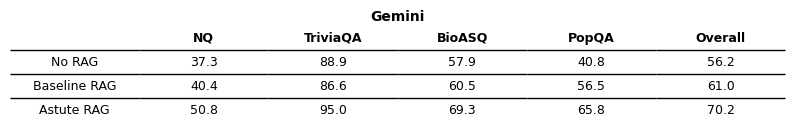

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from acc_prec import load_results, calculate_accuracy_by_dataset, calculate_accuracy_by_dataset_with_astute_rag

dataset_sizes = {
    "popqa": 260,
    "nq": 260,
    "triviaqa": 261,
    "bioasq": 261
}

# --- No RAG ---
results_no_rag = load_results("output/gpt/gpt_output_with_no_rag.jsonl")
no_rag_accuracy = calculate_accuracy_by_dataset(results_no_rag, dataset_sizes)

# --- Baseline RAG ---
results_rag = load_results("output/gpt/gpt_output_with_base_api_rag.jsonl")
rag_accuracy = calculate_accuracy_by_dataset(results_rag, dataset_sizes)

# --- Astute RAG (t=1) ---

import os


acc_with_astute_rag["overall"] = round(sum(acc_with_astute_rag.values()) / len(acc_with_astute_rag), 1)

# --- 테이블 시각화 ---
data = {
    "NQ":       [round(no_rag_accuracy["nq"],       1), round(rag_accuracy["nq"],       1), round(acc_with_astute_rag["nq"],       1)],
    "TriviaQA": [round(no_rag_accuracy["triviaqa"], 1), round(rag_accuracy["triviaqa"], 1), round(acc_with_astute_rag["triviaqa"], 1)],
    "BioASQ":   [round(no_rag_accuracy["bioasq"],   1), round(rag_accuracy["bioasq"],   1), round(acc_with_astute_rag["bioasq"],   1)],
    "PopQA":    [round(no_rag_accuracy["popqa"],    1), round(rag_accuracy["popqa"],    1), round(acc_with_astute_rag["popqa"],    1)],
    "Overall":  [round(no_rag_accuracy["overall"],  1), round(rag_accuracy["overall"],  1), round(acc_with_astute_rag["overall"],  1)],
}

df = pd.DataFrame(data, index=["No RAG", "Baseline RAG", "Astute RAG"])

print("=== 데이터셋별 정확도 (Gemini-2.5 Flash) ===")
print(df.to_string())

fig, ax = plt.subplots(figsize=(8, 1.5))
ax.axis("off")

col_labels = [""] + list(df.columns)
table = ax.table(
    cellText=[[idx] + list(row) for idx, row in zip(df.index, df.values)],
    colLabels=col_labels,
    cellLoc="center",
    loc="center",
)

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

for j in range(len(col_labels)):
    table[(0, j)].set_facecolor("#ffffff")
    table[(0, j)].set_text_props(fontweight="bold")
    table[(0, j)].visible_edges = "B"

for i in range(1, len(df) + 1):
    for j in range(len(col_labels)):
        table[(i, j)].set_facecolor("#ffffff")
        table[(i, j)].visible_edges = "B" if i < len(df) else ""

plt.text(0.5, 0.95, "Gemini-2.5 Flash", ha="center", va="bottom",
         fontsize=10, fontweight="bold", transform=ax.transAxes)

plt.tight_layout()
plt.savefig("results/gemini_accuracy_table.png", bbox_inches="tight", dpi=150)
plt.show()

In [ ]:
# t=2: consolidation 후 최종 답변 생성

for i in range(len(contexts)):
    consolidated_contexts = consolidate_passages(
        llm, questions[i], contexts[i], t=2, P_con=P_con,
    )

## 이 부분 내일 하기기

acc_with_astute_rag_t2 = calculate_accuracy_by_dataset_with_astute_rag(results, dataset_sizes, finalize_answers_t2)
acc_with_astute_rag_t2["overall"] = sum(acc_with_astute_rag_t2.values()) / len(acc_with_astute_rag_t2)

print("=== 데이터셋별 정확도 (Astute RAG t=2) ===")
for name, accuracy in acc_with_astute_rag_t2.items():
    print(f"{name}: {accuracy:.1f}%")

### Astute RAG 결과 저장

In [ ]:
with open("./output/gpt_output_with_astute_rag.jsonl", "w", encoding="utf-8") as f:
    for i, item in enumerate(results):
        result = {
            "question": item["question"],
            "answers": finalize_answers_t2[i],
            "ground_truth": item["ground_truth"],
            "docs": item["docs"],
            "internal_passage": I[i] if i < len(I) else None,
            "baseline_answer": item["answers"]
        }
        f.write(json.dumps(result, ensure_ascii=False) + "\n")

print("저장 완료: ./output/gpt_output_with_astute_rag.jsonl")

### 시각화

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "NQ": [0, 0, 0],
    "TriviaQA": [0, 0, 0],
    "BioASQ": [0, 0, 0],
    "PopQA": [0, 0, 0],
    "Overall": [0, 0, 0]
}

for key in data:
    data[key][0] = round(no_rag_accuracy[key.lower()], 1)
    data[key][1] = round(rag_accuracy[key.lower()], 1)
    data[key][2] = round(acc_with_astute_rag_t2[key.lower()], 1)

df = pd.DataFrame(data, index=["No RAG", "Baseline RAG", "Astute RAG"])

fig, ax = plt.subplots(figsize=(8, 1.5))
ax.axis("off")

col_labels = [""] + list(df.columns)
table = ax.table(
    cellText=[[idx] + list(row) for idx, row in zip(df.index, df.values)],
    colLabels=col_labels,
    cellLoc="center",
    loc="center"
)

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

for j in range(len(col_labels)):
    table[(0, j)].set_facecolor("#ffffff")
    table[(0, j)].set_text_props(fontweight="bold")
    table[(0, j)].visible_edges = "B"

for i in range(1, len(df) + 1):
    for j in range(len(col_labels)):
        table[(i, j)].set_facecolor("#ffffff")
        table[(i, j)].visible_edges = "B" if i < len(df) else ""

plt.text(0.5, 0.95, "GPT-4o-mini", ha="center", va="bottom",
         fontsize=10, fontweight="bold", transform=ax.transAxes)

plt.tight_layout()
plt.show()